In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 过拟合与欠拟合

In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/天池/工业蒸汽

/content/drive/MyDrive/Colab Notebooks/天池/工业蒸汽


### 获取并绘制数据集


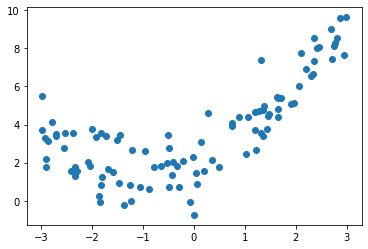

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(666)
x = np.random.uniform(-3.0, 3.0, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size=100)

plt.scatter(x, y)
plt.show()

使用线性回归拟合数据

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.score(X, y)
# 输出：0.4953707811865009

0.4953707811865009

准确率为 0.495，比较低，直线拟合数据的程度较低。

### 使用均方误差判断拟合程度

In [ ]:
from sklearn.metrics import mean_squared_error

y_predict = lin_reg.predict(X)
mean_squared_error(y, y_predict)
# 输出：3.0750025765636577

3.0750025765636577

### 绘制拟合结果

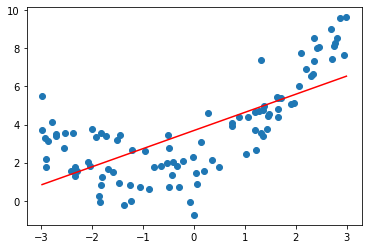

In [ ]:
y_predict = lin_reg.predict(X)
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')
plt.show()

### 使用多项式回归拟合

* 封装 Pipeline 管道

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

def PolynomialRegression(degree):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('lin_reg', LinearRegression())
    ])

* 使用 Pipeline 拟合数据：degree = 2

In [ ]:
poly2_reg = PolynomialRegression(degree=2)
poly2_reg.fit(X, y)

y2_predict = poly2_reg.predict(X)

# 比较真值和预测值的均方误差
mean_squared_error(y, y2_predict)
# 输出：1.0987392142417856

1.0987392142417856

* 绘制拟合结果

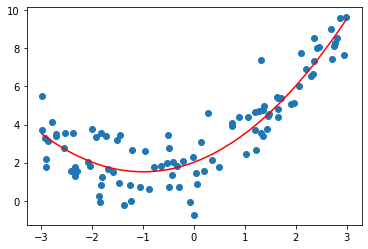

In [ ]:
plt.scatter(x, y)
plt.plot(np.sort(x), y2_predict[np.argsort(x)], color='r')
plt.show()

* 调整 degree = 10

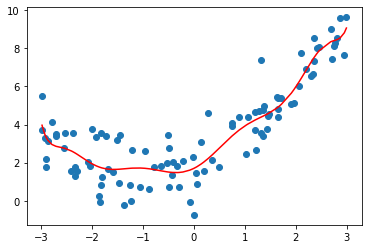

In [ ]:
poly10_reg = PolynomialRegression(degree=10)
poly10_reg.fit(X, y)

y10_predict = poly10_reg.predict(X)
mean_squared_error(y, y10_predict)
# 输出：1.0508466763764164


plt.scatter(x, y)
plt.plot(np.sort(x), y10_predict[np.argsort(x)], color='r')
plt.show()

* 调整 degree = 100


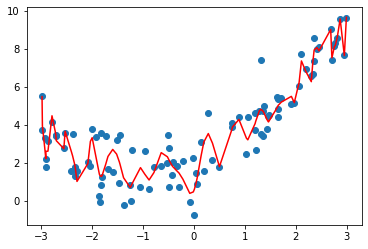

In [ ]:
poly100_reg = PolynomialRegression(degree=100)
poly100_reg.fit(X, y)

y100_predict = poly100_reg.predict(X)
mean_squared_error(y, y100_predict)
# 输出：0.6874357783433694


plt.scatter(x, y)
plt.plot(np.sort(x), y100_predict[np.argsort(x)], color='r')
plt.show()

* 分析
    1. degree=2：均方误差为 1.0987392142417856；
    2. degree=10：均方误差为 1.0508466763764164；
    3. degree=100：均方误差为 0.6874357783433694；
    4. degree 越大拟合的效果越好，因为样本点是一定的，我们总能找到一条曲线将所有的样本点拟合，也就是说将所有的样本点都完全落在这根曲线上，使得整体的均方误差为 0；
    5. 红色曲线并不是所计算出的拟合曲线，而此红色曲线只是原有的数据点对应的 y 的预测值连接出来的结果，而且有的地方没有数据点，因此连接的结果和原来的曲线不一样；

## 交叉验证

### 交叉验证迭代器

**K折交叉验证**： KFold 将所有的样例划分为 k 个组，称为折叠 (fold) （如果 k = n， 这等价于 Leave One Out（留一） 策略），都具有相同的大小（如果可能）。预测函数学习时使用 k - 1 个折叠中的数据，最后一个剩下的折叠会用于测试。

**K折重复多次**： RepeatedKFold 重复 K-Fold n 次。当需要运行时可以使用它 KFold n 次，在每次重复中产生不同的分割。

**留一交叉验证**： LeaveOneOut (或 LOO) 是一个简单的交叉验证。每个学习集都是通过除了一个样本以外的所有样本创建的，测试集是被留下的样本。 因此，对于 n 个样本，我们有 n 个不同的训练集和 n 个不同的测试集。这种交叉验证程序不会浪费太多数据，因为只有一个样本是从训练集中删除掉的:

**留P交叉验证**： LeavePOut 与 LeaveOneOut 非常相似，因为它通过从整个集合中删除 p 个样本来创建所有可能的 训练/测试集。对于 n 个样本，这产生了 {n \choose p} 个 训练-测试 对。与 LeaveOneOut 和 KFold 不同，当 p > 1 时，测试集会重叠。

**用户自定义数据集划分： ShuffleSplit** 迭代器将会生成一个用户给定数量的独立的训练/测试数据划分。样例首先被打散然后划分为一对训练测试集合。

**设置每次生成的随机数相同**： 可以通过设定明确的 random_state ，使得伪随机生成器的结果可以重复。

### 基于类标签、具有分层的交叉验证迭代器

如何解决样本不平衡问题？ 使用StratifiedKFold和StratifiedShuffleSplit 分层抽样。 一些分类问题在目标类别的分布上可能表现出很大的不平衡性：例如，可能会出现比正样本多数倍的负样本。在这种情况下，建议采用如 StratifiedKFold 和 StratifiedShuffleSplit 中实现的分层抽样方法，确保相对的类别频率在每个训练和验证 折叠 中大致保留。

**StratifiedKFold**是 k-fold 的变种，会返回 stratified（分层） 的折叠：每个小集合中， 各个类别的样例比例大致和完整数据集中相同。

**StratifiedShuffleSplit**是 ShuffleSplit 的一个变种，会返回直接的划分，比如： 创建一个划分，但是划分中每个类的比例和完整数据集中的相同。

### 用于分组数据的交叉验证迭代器

如何进一步测试模型的泛化能力？ 留出一组特定的不属于测试集和训练集的数据。有时我们想知道在一组特定的 groups 上训练的模型是否能很好地适用于看不见的 group 。为了衡量这一点，我们需要确保验证对象中的所有样本来自配对训练折叠中完全没有表示的组。

**GroupKFold**是 k-fold 的变体，它确保同一个 group 在测试和训练集中都不被表示。 例如，如果数据是从不同的 subjects 获得的，每个 subject 有多个样本，并且如果模型足够灵活以高度人物指定的特征中学习，则可能无法推广到新的 subject 。 GroupKFold 可以检测到这种过拟合的情况。

**LeaveOneGroupOut**是一个交叉验证方案，它根据第三方提供的 array of integer groups （整数组的数组）来提供样本。这个组信息可以用来编码任意域特定的预定义交叉验证折叠。

每个训练集都是由除特定组别以外的所有样本构成的。

**LeavePGroupsOut**类似于 LeaveOneGroupOut ，但为每个训练/测试集删除与 P 组有关的样本。

**GroupShuffleSplit**迭代器是 ShuffleSplit 和 LeavePGroupsOut 的组合，它生成一个随机划分分区的序列，其中为每个分组提供了一个组子集。

### 时间序列分割

**TimeSeriesSplit**是 k-fold 的一个变体，它首先返回 k 折作为训练数据集，并且 (k+1) 折作为测试数据集。 请注意，与标准的交叉验证方法不同，连续的训练集是超越前者的超集。 另外，它将所有的剩余数据添加到第一个训练分区，它总是用来训练模型。


In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score,cross_validate # 交叉验证所需的函数
from sklearn.model_selection import KFold,LeaveOneOut,LeavePOut,ShuffleSplit # 交叉验证所需的子集划分方法
from sklearn.model_selection import StratifiedKFold,StratifiedShuffleSplit # 分层分割
from sklearn.model_selection import GroupKFold,LeaveOneGroupOut,LeavePGroupsOut,GroupShuffleSplit # 分组分割
from sklearn.model_selection import TimeSeriesSplit # 时间序列分割
from sklearn import datasets  # 自带数据集
from sklearn import svm  # SVM算法
from sklearn import preprocessing  # 预处理模块
from sklearn.metrics import recall_score  # 模型度量

iris = datasets.load_iris()  # 加载数据集
print('样本集大小：',iris.data.shape,iris.target.shape)

# ===================================数据集划分,训练模型==========================
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)  # 交叉验证划分训练集和测试集.test_size为测试集所占的比例
print('训练集大小：',X_train.shape,y_train.shape)  # 训练集样本大小
print('测试集大小：',X_test.shape,y_test.shape)  # 测试集样本大小
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train) # 使用训练集训练模型
print('准确率：',clf.score(X_test, y_test))  # 计算测试集的度量值（准确率）


#  如果涉及到归一化，则在测试集上也要使用训练集模型提取的归一化函数。
scaler = preprocessing.StandardScaler().fit(X_train)  # 通过训练集获得归一化函数模型。（也就是先减几，再除以几的函数）。在训练集和测试集上都使用这个归一化函数
X_train_transformed = scaler.transform(X_train)
clf = svm.SVC(kernel='linear', C=1).fit(X_train_transformed, y_train) # 使用训练集训练模型
X_test_transformed = scaler.transform(X_test)
print(clf.score(X_test_transformed, y_test))  # 计算测试集的度量值（准确度）

# ===================================直接调用交叉验证评估模型==========================
clf = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(clf, iris.data, iris.target, cv=5)  #cv为迭代次数。
print(scores)  # 打印输出每次迭代的度量值（准确度）
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))  # 获取置信区间。（也就是均值和方差）

# ===================================多种度量结果======================================
scoring = ['precision_macro', 'recall_macro'] # precision_macro为精度，recall_macro为召回率
scores = cross_validate(clf, iris.data, iris.target, scoring=scoring, cv=5, return_train_score=True)
sorted(scores.keys())
print('测试结果：',scores)  # scores类型为字典。包含训练得分，拟合次数， score-times （得分次数）


# ==================================K折交叉验证、留一交叉验证、留p交叉验证、随机排列交叉验证==========================================
# k折划分子集
kf = KFold(n_splits=2)
for train, test in kf.split(iris.data):
    print("k折划分：%s %s" % (train.shape, test.shape))
    break

# 留一划分子集
loo = LeaveOneOut()
for train, test in loo.split(iris.data):
    print("留一划分：%s %s" % (train.shape, test.shape))
    break

# 留p划分子集
lpo = LeavePOut(p=2)
for train, test in loo.split(iris.data):
    print("留p划分：%s %s" % (train.shape, test.shape))
    break

# 随机排列划分子集
ss = ShuffleSplit(n_splits=3, test_size=0.25,random_state=0)
for train_index, test_index in ss.split(iris.data):
    print("随机排列划分：%s %s" % (train.shape, test.shape))
    break

# ==================================分层K折交叉验证、分层随机交叉验证==========================================
skf = StratifiedKFold(n_splits=3)  #各个类别的比例大致和完整数据集中相同
for train, test in skf.split(iris.data, iris.target):
    print("分层K折划分：%s %s" % (train.shape, test.shape))
    break

skf = StratifiedShuffleSplit(n_splits=3)  # 划分中每个类的比例和完整数据集中的相同
for train, test in skf.split(iris.data, iris.target):
    print("分层随机划分：%s %s" % (train.shape, test.shape))
    break


# ==================================组 k-fold交叉验证、留一组交叉验证、留 P 组交叉验证、Group Shuffle Split==========================================
X = [0.1, 0.2, 2.2, 2.4, 2.3, 4.55, 5.8, 8.8, 9, 10]
y = ["a", "b", "b", "b", "c", "c", "c", "d", "d", "d"]
groups = [1, 1, 1, 2, 2, 2, 3, 3, 3, 3]

# k折分组
gkf = GroupKFold(n_splits=3)  # 训练集和测试集属于不同的组
for train, test in gkf.split(X, y, groups=groups):
    print("组 k-fold分割：%s %s" % (train, test))

# 留一分组
logo = LeaveOneGroupOut()
for train, test in logo.split(X, y, groups=groups):
    print("留一组分割：%s %s" % (train, test))

# 留p分组
lpgo = LeavePGroupsOut(n_groups=2)
for train, test in lpgo.split(X, y, groups=groups):
    print("留 P 组分割：%s %s" % (train, test))

# 随机分组
gss = GroupShuffleSplit(n_splits=4, test_size=0.5, random_state=0)
for train, test in gss.split(X, y, groups=groups):
    print("随机分割：%s %s" % (train, test))


# ==================================时间序列分割==========================================
tscv = TimeSeriesSplit(n_splits=3)
TimeSeriesSplit(max_train_size=None, n_splits=3)
for train, test in tscv.split(iris.data):
    print("时间序列分割：%s %s" % (train, test))

样本集大小： (150, 4) (150,)
训练集大小： (90, 4) (90,)
测试集大小： (60, 4) (60,)
准确率： 0.9666666666666667
0.9333333333333333
[0.96666667 1.         0.96666667 0.96666667 1.        ]
Accuracy: 0.98 (+/- 0.03)
测试结果： {'fit_time': array([0.        , 0.        , 0.00103736, 0.        , 0.00099921]), 'score_time': array([0.00199533, 0.00103354, 0.00098062, 0.00099969, 0.00097179]), 'test_precision_macro': array([0.96969697, 1.        , 0.96969697, 0.96969697, 1.        ]), 'train_precision_macro': array([0.97674419, 0.97674419, 0.99186992, 0.98412698, 0.98333333]), 'test_recall_macro': array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ]), 'train_recall_macro': array([0.975     , 0.975     , 0.99166667, 0.98333333, 0.98333333])}
k折划分：(75,) (75,)
留一划分：(149,) (1,)
留p划分：(149,) (1,)
随机排列划分：(149,) (1,)
分层K折划分：(100,) (50,)
分层随机划分：(135,) (15,)
组 k-fold分割：[0 1 2 3 4 5] [6 7 8 9]
组 k-fold分割：[0 1 2 6 7 8 9] [3 4 5]
组 k-fold分割：[3 4 5 6 7 8 9] [0 1 2]
留一组分割：[3 4 5 6 7 8 9] [0 1 2]
留一组分割：[0 1 2 6 7 8 9] [3 

## 网格搜索

Grid Search：一种调参手段；穷举搜索：在所有候选的参数选择中，通过循环遍历，尝试每一种可能性，表现最好的参数就是最终的结果。其原理就像是在数组里找最大值。

### 简单的网格搜索

In [ ]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

iris = load_iris()
X_train,X_test,y_train,y_test = train_test_split(iris.data,iris.target,random_state=0)
print("Size of training set:{} size of testing set:{}".format(X_train.shape[0],X_test.shape[0]))

####   grid search start
best_score = 0
for gamma in [0.001,0.01,0.1,1,10,100]:
    for C in [0.001,0.01,0.1,1,10,100]:
        svm = SVC(gamma=gamma,C=C)#对于每种参数可能的组合，进行一次训练；
        svm.fit(X_train,y_train)
        score = svm.score(X_test,y_test)
        if score > best_score:#找到表现最好的参数
            best_score = score
            best_parameters = {'gamma':gamma,'C':C}
####   grid search end

print("Best score:{:.2f}".format(best_score))
print("Best parameters:{}".format(best_parameters))

Size of training set:112 size of testing set:38
Best score:0.97
Best parameters:{'gamma': 0.001, 'C': 100}


### Grid Search with Cross Validation


In [ ]:
X_trainval,X_test,y_trainval,y_test = train_test_split(iris.data,iris.target,random_state=0)
X_train,X_val,y_train,y_val = train_test_split(X_trainval,y_trainval,random_state=1)
print("Size of training set:{} size of validation set:{} size of testing set:{}".format(X_train.shape[0],X_val.shape[0],X_test.shape[0]))

best_score = 0.0
for gamma in [0.001,0.01,0.1,1,10,100]:
    for C in [0.001,0.01,0.1,1,10,100]:
        svm = SVC(gamma=gamma,C=C)
        svm.fit(X_train,y_train)
        score = svm.score(X_val,y_val)
        if score > best_score:
            best_score = score
            best_parameters = {'gamma':gamma,'C':C}
svm = SVC(**best_parameters) #使用最佳参数，构建新的模型
svm.fit(X_trainval,y_trainval) #使用训练集和验证集进行训练，more data always results in good performance.
test_score = svm.score(X_test,y_test) # evaluation模型评估
print("Best score on validation set:{:.2f}".format(best_score))
print("Best parameters:{}".format(best_parameters))
print("Best score on test set:{:.2f}".format(test_score))

Size of training set:84 size of validation set:28 size of testing set:38
Best score on validation set:0.96
Best parameters:{'gamma': 0.001, 'C': 10}
Best score on test set:0.92


In [ ]:
from sklearn.model_selection import cross_val_score

best_score = 0.0
for gamma in [0.001,0.01,0.1,1,10,100]:
    for C in [0.001,0.01,0.1,1,10,100]:
        svm = SVC(gamma=gamma,C=C)
        scores = cross_val_score(svm,X_trainval,y_trainval,cv=5) #5折交叉验证
        score = scores.mean() #取平均数
        if score > best_score:
            best_score = score
            best_parameters = {"gamma":gamma,"C":C}
svm = SVC(**best_parameters)
svm.fit(X_trainval,y_trainval)
test_score = svm.score(X_test,y_test)
print("Best score on validation set:{:.2f}".format(best_score))
print("Best parameters:{}".format(best_parameters))
print("Score on testing set:{:.2f}".format(test_score))

Best score on validation set:0.97
Best parameters:{'gamma': 0.1, 'C': 10}
Score on testing set:0.97


交叉验证经常与网格搜索进行结合，作为参数评价的一种方法，这种方法叫做grid search with cross validation。sklearn因此设计了一个这样的类GridSearchCV，这个类实现了fit，predict，score等方法，被当做了一个estimator，使用fit方法，该过程中：（1）搜索到最佳参数；（2）实例化了一个最佳参数的estimator；

In [ ]:
from sklearn.model_selection import GridSearchCV

#把要调整的参数以及其候选值 列出来；
param_grid = {"gamma":[0.001,0.01,0.1,1,10,100],
             "C":[0.001,0.01,0.1,1,10,100]}
print("Parameters:{}".format(param_grid))

grid_search = GridSearchCV(SVC(),param_grid,cv=5) #实例化一个GridSearchCV类
X_train,X_test,y_train,y_test = train_test_split(iris.data,iris.target,random_state=10)
grid_search.fit(X_train,y_train) #训练，找到最优的参数，同时使用最优的参数实例化一个新的SVC estimator。
print("Test set score:{:.2f}".format(grid_search.score(X_test,y_test)))
print("Best parameters:{}".format(grid_search.best_params_))
print("Best score on train set:{:.2f}".format(grid_search.best_score_))

Parameters:{'gamma': [0.001, 0.01, 0.1, 1, 10, 100], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}
Test set score:0.97
Best parameters:{'C': 10, 'gamma': 0.1}
Best score on train set:0.98


## 学习曲线和验证曲线

### 学习曲线

In [18]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [ ]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt 

<module 'matplotlib.pyplot' from 'c:\\users\\wyx\\appdata\\local\\programs\\python\\python37\\lib\\site-packages\\matplotlib\\pyplot.py'>

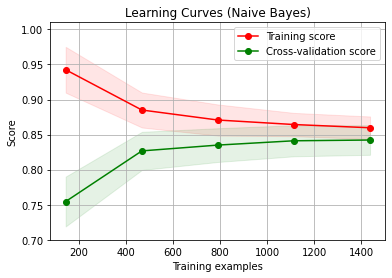

In [ ]:
digits = load_digits()
X, y = digits.data, digits.target

title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = GaussianNB()
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

<module 'matplotlib.pyplot' from 'c:\\users\\wyx\\appdata\\local\\programs\\python\\python37\\lib\\site-packages\\matplotlib\\pyplot.py'>

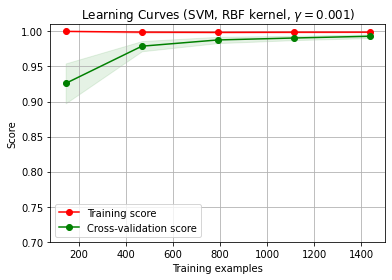

In [ ]:
title = "Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = SVC(gamma=0.001)
plot_learning_curve(estimator, title, X, y, (0.7, 1.01), cv=cv, n_jobs=4)

### 验证曲线

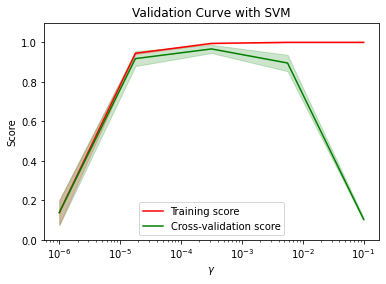

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn. model_selection import validation_curve

digits = load_digits()
X, y = digits.data, digits.target

param_range = np.logspace(-6, -1, 5)
train_scores, test_scores = validation_curve(
    SVC(), X, y, param_name="gamma", param_range=param_range,
    cv=10, scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with SVM")
plt.xlabel("$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
plt.semilogx(param_range, train_scores_mean, label="Training score", color="r")
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2, color="r")
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="g")
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2, color="g")
plt.legend(loc="best")
plt.show()

## 工业蒸汽赛题模型验证

### 模型过拟合与欠拟合

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LinearRegression  #线性回归
from sklearn.neighbors import KNeighborsRegressor  #K近邻回归
from sklearn.tree import DecisionTreeRegressor     #决策树回归
from sklearn.ensemble import RandomForestRegressor #随机森林回归
from sklearn.svm import SVR  #支持向量回归
import lightgbm as lgb #lightGbm模型

from sklearn.model_selection import train_test_split # 切分数据
from sklearn.metrics import mean_squared_error #评价指标

from sklearn.linear_model import SGDRegressor

In [22]:
train_data_file = "./zhengqi_train.txt"
test_data_file =  "./zhengqi_test.txt"

train_data = pd.read_csv(train_data_file, sep='\t', encoding='utf-8')
test_data = pd.read_csv(test_data_file, sep='\t', encoding='utf-8')

In [23]:
from sklearn import preprocessing 

features_columns = [col for col in train_data.columns if col not in ['target']]

min_max_scaler = preprocessing.MinMaxScaler()

min_max_scaler = min_max_scaler.fit(train_data[features_columns])

train_data_scaler = min_max_scaler.transform(train_data[features_columns])
test_data_scaler = min_max_scaler.transform(test_data[features_columns])

train_data_scaler = pd.DataFrame(train_data_scaler)
train_data_scaler.columns = features_columns

test_data_scaler = pd.DataFrame(test_data_scaler)
test_data_scaler.columns = features_columns

train_data_scaler['target'] = train_data['target']

In [24]:
from sklearn.decomposition import PCA   #主成分分析法

#PCA方法降维
#保留16个主成分
pca = PCA(n_components=16)
new_train_pca_16 = pca.fit_transform(train_data_scaler.iloc[:,0:-1])
new_test_pca_16 = pca.transform(test_data_scaler)
new_train_pca_16 = pd.DataFrame(new_train_pca_16)
new_test_pca_16 = pd.DataFrame(new_test_pca_16)
new_train_pca_16['target'] = train_data_scaler['target']

In [25]:
#采用 pca 保留16维特征的数据
new_train_pca_16 = new_train_pca_16.fillna(0)
train = new_train_pca_16[new_test_pca_16.columns]
target = new_train_pca_16['target']

# 切分数据 训练数据80% 验证数据20%
train_data,test_data,train_target,test_target=train_test_split(train,target,test_size=0.2,random_state=0)

### 欠拟合

In [ ]:
clf = SGDRegressor(max_iter=500, tol=1e-2) 
clf.fit(train_data, train_target)
score_train = mean_squared_error(train_target, clf.predict(train_data))
score_test = mean_squared_error(test_target, clf.predict(test_data))
print("SGDRegressor train MSE:   ", score_train)
print("SGDRegressor test MSE:   ", score_test)

SGDRegressor train MSE:    0.15155642526881202
SGDRegressor test MSE:    0.15575007108833636


### 过拟合

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(5)
train_data_poly = poly.fit_transform(train_data)
test_data_poly = poly.transform(test_data)
clf = SGDRegressor(max_iter=1000, tol=1e-3) 
clf.fit(train_data_poly, train_target)
score_train = mean_squared_error(train_target, clf.predict(train_data_poly))
score_test = mean_squared_error(test_target, clf.predict(test_data_poly))
print("SGDRegressor train MSE:   ", score_train)
print("SGDRegressor test MSE:   ", score_test)

SGDRegressor train MSE:    0.13250496480040372
SGDRegressor test MSE:    0.14507395222174507


### 正常拟合

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(3)
train_data_poly = poly.fit_transform(train_data)
test_data_poly = poly.transform(test_data)
clf = SGDRegressor(max_iter=1000, tol=1e-3) 
clf.fit(train_data_poly, train_target)
score_train = mean_squared_error(train_target, clf.predict(train_data_poly))
score_test = mean_squared_error(test_target, clf.predict(test_data_poly))
print("SGDRegressor train MSE:   ", score_train)
print("SGDRegressor test MSE:   ", score_test)

SGDRegressor train MSE:    0.13409582641932133
SGDRegressor test MSE:    0.14233896203027996


### 模型正则化

**L2范数正则化**

In [ ]:
poly = PolynomialFeatures(3)
train_data_poly = poly.fit_transform(train_data)
test_data_poly = poly.transform(test_data)
clf = SGDRegressor(max_iter=1000, tol=1e-3, penalty= 'L2', alpha=0.0001) 
clf.fit(train_data_poly, train_target)
score_train = mean_squared_error(train_target, clf.predict(train_data_poly))
score_test = mean_squared_error(test_target, clf.predict(test_data_poly))
print("SGDRegressor train MSE:   ", score_train)
print("SGDRegressor test MSE:   ", score_test)

SGDRegressor train MSE:    0.1340956770423214
SGDRegressor test MSE:    0.14280704686271073


**L1范数正则化**

In [ ]:
poly = PolynomialFeatures(3)
train_data_poly = poly.fit_transform(train_data)
test_data_poly = poly.transform(test_data)
clf = SGDRegressor(max_iter=1000, tol=1e-3, penalty= 'L1', alpha=0.00001) 
clf.fit(train_data_poly, train_target)
score_train = mean_squared_error(train_target, clf.predict(train_data_poly))
score_test = mean_squared_error(test_target, clf.predict(test_data_poly))
print("SGDRegressor train MSE:   ", score_train)
print("SGDRegressor test MSE:   ", score_test)

SGDRegressor train MSE:    0.1340662175468273
SGDRegressor test MSE:    0.14262865014631226


**ElasticNet L1和L2范数加权正则化**

In [ ]:
poly = PolynomialFeatures(3)
train_data_poly = poly.fit_transform(train_data)
test_data_poly = poly.transform(test_data)
clf = SGDRegressor(max_iter=1000, tol=1e-3, penalty= 'elasticnet', l1_ratio=0.9, alpha=0.00001) 
clf.fit(train_data_poly, train_target)
score_train = mean_squared_error(train_target, clf.predict(train_data_poly))
score_test = mean_squared_error(test_target, clf.predict(test_data_poly))
print("SGDRegressor train MSE:   ", score_train)
print("SGDRegressor test MSE:   ", score_test)

SGDRegressor train MSE:    0.13406887644910223
SGDRegressor test MSE:    0.14258878413916357


### 模型交叉验证

**简单交叉验证 Hold-out-menthod**

In [ ]:
# 简单交叉验证
from sklearn.model_selection import train_test_split # 切分数据
# 切分数据 训练数据80% 验证数据20%
train_data,test_data,train_target,test_target=train_test_split(train,target,test_size=0.2,random_state=0)

clf = SGDRegressor(max_iter=1000, tol=1e-3) 
clf.fit(train_data, train_target)
score_train = mean_squared_error(train_target, clf.predict(train_data))
score_test = mean_squared_error(test_target, clf.predict(test_data))
print("SGDRegressor train MSE:   ", score_train)
print("SGDRegressor test MSE:   ", score_test)

SGDRegressor train MSE:    0.14155215306589175
SGDRegressor test MSE:    0.14698097358955323


**K折交叉验证 K-fold CV**

In [ ]:
# 5折交叉验证
from sklearn.model_selection import KFold

kf = KFold(n_splits=5)
for k, (train_index, test_index) in enumerate(kf.split(train)):
    train_data,test_data,train_target,test_target = train.values[train_index],train.values[test_index],target[train_index],target[test_index]
    clf = SGDRegressor(max_iter=1000, tol=1e-3) 
    clf.fit(train_data, train_target)
    score_train = mean_squared_error(train_target, clf.predict(train_data))
    score_test = mean_squared_error(test_target, clf.predict(test_data))
    print(k, " 折", "SGDRegressor train MSE:   ", score_train)
    print(k, " 折", "SGDRegressor test MSE:   ", score_test, '\n')  

0  折 SGDRegressor train MSE:    0.149873369366823
0  折 SGDRegressor test MSE:    0.10623619752949995 

1  折 SGDRegressor train MSE:    0.1335569518461163
1  折 SGDRegressor test MSE:    0.18196809642620862 

2  折 SGDRegressor train MSE:    0.14709994357975933
2  折 SGDRegressor test MSE:    0.134000827112436 

3  折 SGDRegressor train MSE:    0.1407795350885238
3  折 SGDRegressor test MSE:    0.16176265542884627 

4  折 SGDRegressor train MSE:    0.13811283480903389
4  折 SGDRegressor test MSE:    0.16553307771479078 



**留一法 LOO CV**

In [ ]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
num = 100
for k, (train_index, test_index) in enumerate(loo.split(train)):
    train_data,test_data,train_target,test_target = train.values[train_index],train.values[test_index],target[train_index],target[test_index]
    clf = SGDRegressor(max_iter=1000, tol=1e-3) 
    clf.fit(train_data, train_target)
    score_train = mean_squared_error(train_target, clf.predict(train_data))
    score_test = mean_squared_error(test_target, clf.predict(test_data))
    print(k, " 个", "SGDRegressor train MSE:   ", score_train)
    print(k, " 个", "SGDRegressor test MSE:   ", score_test, '\n') 
    if k >= 9:
        break

0  个 SGDRegressor train MSE:    0.14156629102574922
0  个 SGDRegressor test MSE:    0.012039663632318471 

1  个 SGDRegressor train MSE:    0.14157653056016997
1  个 SGDRegressor test MSE:    0.12445244153015589 

2  个 SGDRegressor train MSE:    0.14160383692259973
2  个 SGDRegressor test MSE:    0.03588776196306497 

3  个 SGDRegressor train MSE:    0.14157932479085522
3  个 SGDRegressor test MSE:    0.0031760841001167903 

4  个 SGDRegressor train MSE:    0.14155957833192087
4  个 SGDRegressor test MSE:    0.011449599837543819 

5  个 SGDRegressor train MSE:    0.14155896746015656
5  个 SGDRegressor test MSE:    0.137685979755085 

6  个 SGDRegressor train MSE:    0.14159424642594393
6  个 SGDRegressor test MSE:    0.022929630087583773 

7  个 SGDRegressor train MSE:    0.14169980895501158
7  个 SGDRegressor test MSE:    0.0005570128904942495 

8  个 SGDRegressor train MSE:    0.14105250402107591
8  个 SGDRegressor test MSE:    0.08346136433607759 

9  个 SGDRegressor train MSE:    0.1414959332872045

**留P法 LPO CV**

In [26]:
from sklearn.model_selection import LeavePOut
lpo = LeavePOut(p=10)
num = 100
for k, (train_index, test_index) in enumerate(lpo.split(train)):
    train_data,test_data,train_target,test_target = train.values[train_index],train.values[test_index],target[train_index],target[test_index]
    clf = SGDRegressor(max_iter=1000, tol=1e-3) 
    clf.fit(train_data, train_target)
    score_train = mean_squared_error(train_target, clf.predict(train_data))
    score_test = mean_squared_error(test_target, clf.predict(test_data))
    print(k, " 10个", "SGDRegressor train MSE:   ", score_train)
    print(k, " 10个", "SGDRegressor test MSE:   ", score_test, '\n') 
    if k >= 9:
        break

0  10个 SGDRegressor train MSE:    0.14194211921770045
0  10个 SGDRegressor test MSE:    0.04939719088402371 

1  10个 SGDRegressor train MSE:    0.14196434228723515
1  10个 SGDRegressor test MSE:    0.04463246331555513 

2  10个 SGDRegressor train MSE:    0.14200335415041754
2  10个 SGDRegressor test MSE:    0.046626078774042665 

3  10个 SGDRegressor train MSE:    0.14194866575752496
3  10个 SGDRegressor test MSE:    0.05455167692860223 

4  10个 SGDRegressor train MSE:    0.14185608272344719
4  10个 SGDRegressor test MSE:    0.06925889979569261 

5  10个 SGDRegressor train MSE:    0.14190023001468072
5  10个 SGDRegressor test MSE:    0.04490952265672639 

6  10个 SGDRegressor train MSE:    0.14195459571860017
6  10个 SGDRegressor test MSE:    0.04953080399849765 

7  10个 SGDRegressor train MSE:    0.14131417827779008
7  10个 SGDRegressor test MSE:    0.05240210531412798 

8  10个 SGDRegressor train MSE:    0.14206343655544543
8  10个 SGDRegressor test MSE:    0.04712897569890144 

9  10个 SGDRegresso

### 模型超参空间及调参

**穷举网格搜索**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split # 切分数据
# 切分数据 训练数据80% 验证数据20%
train_data,test_data,train_target,test_target=train_test_split(train,target,test_size=0.2,random_state=0)

randomForestRegressor = RandomForestRegressor()
parameters = {
              'n_estimators':[50, 100, 200],
              'max_depth':[1, 2, 3]
        }

clf = GridSearchCV(randomForestRegressor, parameters, cv=5)
clf.fit(train_data, train_target)

score_test = mean_squared_error(test_target, clf.predict(test_data))

print("RandomForestRegressor GridSearchCV test MSE:   ", score_test)
sorted(clf.cv_results_.keys())

RandomForestRegressor GridSearchCV test MSE:    0.25584422397138007


['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_max_depth',
 'param_n_estimators',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

**随机参数优化**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split # 切分数据
# 切分数据 训练数据80% 验证数据20%
train_data,test_data,train_target,test_target=train_test_split(train,target,test_size=0.2,random_state=0)

randomForestRegressor = RandomForestRegressor()
parameters = {
          'n_estimators':[50, 100, 200, 300],
          'max_depth':[1, 2, 3, 4, 5]
        }

clf = RandomizedSearchCV(randomForestRegressor, parameters, cv=5)
clf.fit(train_data, train_target)

score_test = mean_squared_error(test_target, clf.predict(test_data))

print("RandomForestRegressor RandomizedSearchCV test MSE:   ", score_test)
sorted(clf.cv_results_.keys())

RandomForestRegressor RandomizedSearchCV test MSE:    0.19630764244660898


['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_max_depth',
 'param_n_estimators',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

**Lgb 调参**

In [ ]:
clf = lgb.LGBMRegressor(num_leaves=31)

parameters = {
    'learning_rate': [0.01, 0.1, 1],
    'n_estimators': [20, 40]
}

clf = GridSearchCV(clf, parameters, cv=5)
clf.fit(train_data, train_target)

print('Best parameters found by grid search are:', clf.best_params_)
score_test = mean_squared_error(test_target, clf.predict(test_data))
print("LGBMRegressor RandomizedSearchCV test MSE:   ", score_test)

Best parameters found by grid search are: {'learning_rate': 0.1, 'n_estimators': 40}
LGBMRegressor RandomizedSearchCV test MSE:    0.1519667454804457


**Lgb 线下验证**

In [ ]:
train_data2 = pd.read_csv('./zhengqi_train.txt',sep='\t')
test_data2 = pd.read_csv('./zhengqi_test.txt',sep='\t')

train_data2_f = train_data2[test_data2.columns].values
train_data2_target = train_data2['target'].values

In [ ]:
# lgb 模型
from sklearn.model_selection  import KFold
import lightgbm as lgb
import numpy as np


# 5折交叉验证
Folds=5
kf = KFold(len(train_data2_f), n_splits=Folds, random_state=100, shuffle=True)
# 记录训练和预测MSE
MSE_DICT = {
    'train_mse':[],
    'test_mse':[]
}

# 线下训练预测
for i, (train_index, test_index) in enumerate(kf.split(train_data2_f)):
    # lgb树模型
    lgb_reg = lgb.LGBMRegressor(
        learning_rate=0.01,
        max_depth=-1,
        n_estimators=100,
        boosting_type='gbdt',
        random_state=100,
        objective='regression',
    )
   
    # 切分训练集和预测集
    X_train_KFold, X_test_KFold = train_data2_f[train_index], train_data2_f[test_index]
    y_train_KFold, y_test_KFold = train_data2_target[train_index], train_data2_target[test_index]
    
    # 训练模型
#     reg.fit(X_train_KFold, y_train_KFold)
    lgb_reg.fit(
            X=X_train_KFold,y=y_train_KFold,
            eval_set=[(X_train_KFold, y_train_KFold),(X_test_KFold, y_test_KFold)],
            eval_names=['Train','Test'],
            early_stopping_rounds=100,
            eval_metric='MSE',
            verbose=50
        )


    # 训练集预测 测试集预测
    y_train_KFold_predict = lgb_reg.predict(X_train_KFold,num_iteration=lgb_reg.best_iteration_)
    y_test_KFold_predict = lgb_reg.predict(X_test_KFold,num_iteration=lgb_reg.best_iteration_) 
    
    print('第{}折 训练和预测 训练MSE 预测MSE'.format(i))
    train_mse = mean_squared_error(y_train_KFold_predict, y_train_KFold)
    print('------\n', '训练MSE\n', train_mse, '\n------')
    test_mse = mean_squared_error(y_test_KFold_predict, y_test_KFold)
    print('------\n', '预测MSE\n', test_mse, '\n------\n')
    
    MSE_DICT['train_mse'].append(train_mse)
    MSE_DICT['test_mse'].append(test_mse)
print('------\n', '训练MSE\n', MSE_DICT['train_mse'], '\n', np.mean(MSE_DICT['train_mse']), '\n------')
print('------\n', '预测MSE\n', MSE_DICT['test_mse'], '\n', np.mean(MSE_DICT['test_mse']), '\n------')

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.433641	Test's l2: 1.26094
[100]	Train's l2: 0.225389	Test's l2: 0.395946
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225389	Test's l2: 0.395946
第0折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2253894593907278 
------
------
 预测MSE
 0.39594615791032484 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434194	Test's l2: 0.21387
[100]	Train's l2: 0.225623	Test's l2: 0.142998
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225623	Test's l2: 0.142998
第1折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22562318918023602 
------
------
 预测MSE
 0.14299832987129202 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.43384	Test's l2: 1.22148
[100]	Train's l2: 0.225411	Test's l2: 0.903757
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225411	Test's l2: 0.903757
第2折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 

[50]	Train's l2: 0.434077	Test's l2: 0.562771
[100]	Train's l2: 0.225637	Test's l2: 0.4199
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225637	Test's l2: 0.4199
第23折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22563738361598687 
------
------
 预测MSE
 0.4198996143730213 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434197	Test's l2: 0.0489831
[100]	Train's l2: 0.225679	Test's l2: 0.00137307
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225679	Test's l2: 0.00137307
第24折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2256794011356225 
------
------
 预测MSE
 0.001373071728960373 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434289	Test's l2: 0.115243
[100]	Train's l2: 0.225732	Test's l2: 0.103908
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225732	Test's l2: 0.103908
第25折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22573192506270742 
------
------
 预测MSE
 0.103908225

[50]	Train's l2: 0.434115	Test's l2: 0.30452
[100]	Train's l2: 0.225699	Test's l2: 0.219579
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225699	Test's l2: 0.219579
第46折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22569891959625216 
------
------
 预测MSE
 0.219579121168575 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434081	Test's l2: 0.417643
[100]	Train's l2: 0.225629	Test's l2: 0.258929
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225629	Test's l2: 0.258929
第47折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22562936993943694 
------
------
 预测MSE
 0.2589290887792611 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434233	Test's l2: 0.122585
[100]	Train's l2: 0.22573	Test's l2: 0.185561
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.22573	Test's l2: 0.185561
第48折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22572989017239578 
------
------
 预测MSE
 0.185560506425532

[50]	Train's l2: 0.43421	Test's l2: 0.0328662
[100]	Train's l2: 0.225719	Test's l2: 0.0132314
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225719	Test's l2: 0.0132314
第69折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2257190631599303 
------
------
 预测MSE
 0.013231440338339966 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.433749	Test's l2: 1.44239
[100]	Train's l2: 0.225468	Test's l2: 0.73053
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225468	Test's l2: 0.73053
第70折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22546838865070964 
------
------
 预测MSE
 0.7305301398254272 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434186	Test's l2: 0.00615191
[100]	Train's l2: 0.225751	Test's l2: 0.00787524
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225751	Test's l2: 0.00787524
第71折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22575084424171585 
------
------
 预测MSE
 0.00787

[50]	Train's l2: 0.434108	Test's l2: 0.51254
[100]	Train's l2: 0.225671	Test's l2: 0.381552
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225671	Test's l2: 0.381552
第92折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22567112003414472 
------
------
 预测MSE
 0.38155215025341577 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434151	Test's l2: 0.188568
[100]	Train's l2: 0.225667	Test's l2: 0.118487
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225667	Test's l2: 0.118487
第93折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22566685892587726 
------
------
 预测MSE
 0.11848746265932666 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434214	Test's l2: 9.85743e-05
[100]	Train's l2: 0.225726	Test's l2: 0.00839482
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225726	Test's l2: 0.00839482
第94折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22572582570274838 
------
------
 预测MSE
 0.008

[50]	Train's l2: 0.43423	Test's l2: 0.0951167
[100]	Train's l2: 0.225671	Test's l2: 0.099472
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225671	Test's l2: 0.099472
第115折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22567064031991427 
------
------
 预测MSE
 0.09947204792399178 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434224	Test's l2: 0.000103335
[100]	Train's l2: 0.225682	Test's l2: 0.000764048
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225682	Test's l2: 0.000764048
第116折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22568248141499722 
------
------
 预测MSE
 0.0007640476754568606 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434127	Test's l2: 0.514
[100]	Train's l2: 0.225646	Test's l2: 0.233945
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225646	Test's l2: 0.233945
第117折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22564603471069292 
------
------
 预测MSE
 

[50]	Train's l2: 0.434024	Test's l2: 0.292803
[100]	Train's l2: 0.22566	Test's l2: 0.212196
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.22566	Test's l2: 0.212196
第138折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22565997359069973 
------
------
 预测MSE
 0.2121955064752934 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.433863	Test's l2: 0.965786
[100]	Train's l2: 0.225515	Test's l2: 0.599638
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225515	Test's l2: 0.599638
第139折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22551542646150666 
------
------
 预测MSE
 0.5996377948237211 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434218	Test's l2: 0.0874755
[100]	Train's l2: 0.22568	Test's l2: 0.0356045
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.22568	Test's l2: 0.0356045
第140折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2256802753536857 
------
------
 预测MSE
 0.0356045094

[50]	Train's l2: 0.433995	Test's l2: 0.307245
[100]	Train's l2: 0.225589	Test's l2: 0.048179
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225589	Test's l2: 0.048179
第161折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22558877467087254 
------
------
 预测MSE
 0.04817898537086292 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434216	Test's l2: 0.00880671
[100]	Train's l2: 0.225682	Test's l2: 0.0154836
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225682	Test's l2: 0.0154836
第162折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2256822316640633 
------
------
 预测MSE
 0.015483627855841398 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.433944	Test's l2: 0.859567
[100]	Train's l2: 0.225682	Test's l2: 0.362964
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225682	Test's l2: 0.362964
第163折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22568196222714498 
------
------
 预测MSE
 0.36

[50]	Train's l2: 0.433927	Test's l2: 0.740399
[100]	Train's l2: 0.225661	Test's l2: 0.197457
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225661	Test's l2: 0.197457
第184折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2256608320560525 
------
------
 预测MSE
 0.1974569550238374 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.43419	Test's l2: 0.207896
[100]	Train's l2: 0.225668	Test's l2: 0.205058
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225668	Test's l2: 0.205058
第185折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22566813487355555 
------
------
 预测MSE
 0.20505795914151356 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434204	Test's l2: 0.164517
[100]	Train's l2: 0.225709	Test's l2: 0.0298404
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225709	Test's l2: 0.0298404
第186折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22570861526791938 
------
------
 预测MSE
 0.0298403

[50]	Train's l2: 0.43367	Test's l2: 1.97402
[100]	Train's l2: 0.225427	Test's l2: 0.991073
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225427	Test's l2: 0.991073
第207折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22542717348408944 
------
------
 预测MSE
 0.9910731570727511 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434173	Test's l2: 0.173895
[100]	Train's l2: 0.225675	Test's l2: 0.0523512
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225675	Test's l2: 0.0523512
第208折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22567504467391084 
------
------
 预测MSE
 0.05235123872397062 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434165	Test's l2: 0.229367
[100]	Train's l2: 0.225609	Test's l2: 0.200553
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225609	Test's l2: 0.200553
第209折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.225608622162978 
------
------
 预测MSE
 0.200552958

[50]	Train's l2: 0.43354	Test's l2: 1.67477
[100]	Train's l2: 0.225281	Test's l2: 0.448845
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225281	Test's l2: 0.448845
第230折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22528092096660288 
------
------
 预测MSE
 0.44884475375339944 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434249	Test's l2: 0.0871105
[100]	Train's l2: 0.225743	Test's l2: 0.0167289
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225743	Test's l2: 0.0167289
第231折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22574270785103417 
------
------
 预测MSE
 0.016728868761375762 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434145	Test's l2: 0.221094
[100]	Train's l2: 0.225757	Test's l2: 0.11542
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225757	Test's l2: 0.11542
第232折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22575664792972633 
------
------
 预测MSE
 0.115420

[50]	Train's l2: 0.434203	Test's l2: 0.0648242
[100]	Train's l2: 0.225765	Test's l2: 0.014317
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225765	Test's l2: 0.014317
第253折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22576456823660973 
------
------
 预测MSE
 0.014317001685081685 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434114	Test's l2: 0.268739
[100]	Train's l2: 0.225714	Test's l2: 0.126731
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225714	Test's l2: 0.126731
第254折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22571382146559105 
------
------
 预测MSE
 0.12673055059864885 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434271	Test's l2: 0.210393
[100]	Train's l2: 0.225865	Test's l2: 0.133343
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225865	Test's l2: 0.133343
第255折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22586455885905135 
------
------
 预测MSE
 0.1333

[50]	Train's l2: 0.43418	Test's l2: 0.396795
[100]	Train's l2: 0.225665	Test's l2: 0.231261
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225665	Test's l2: 0.231261
第276折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2256654096986059 
------
------
 预测MSE
 0.23126146310752527 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.43424	Test's l2: 0.000558298
[100]	Train's l2: 0.225653	Test's l2: 0.0212723
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225653	Test's l2: 0.0212723
第277折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22565292926867306 
------
------
 预测MSE
 0.021272338377431817 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434146	Test's l2: 0.262933
[100]	Train's l2: 0.225706	Test's l2: 0.164187
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225706	Test's l2: 0.164187
第278折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22570569411640348 
------
------
 预测MSE
 0.164

[50]	Train's l2: 0.433901	Test's l2: 0.823545
[100]	Train's l2: 0.22552	Test's l2: 0.363977
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.22552	Test's l2: 0.363977
第299折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22551959368946176 
------
------
 预测MSE
 0.3639770217930362 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434163	Test's l2: 0.227083
[100]	Train's l2: 0.225612	Test's l2: 0.0922022
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225612	Test's l2: 0.0922022
第300折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22561205903173756 
------
------
 预测MSE
 0.09220217915465599 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434174	Test's l2: 0.236862
[100]	Train's l2: 0.225686	Test's l2: 0.0767646
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225686	Test's l2: 0.0767646
第301折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22568591905498625 
------
------
 预测MSE
 0.07676

[50]	Train's l2: 0.434252	Test's l2: 0.0698552
[100]	Train's l2: 0.225807	Test's l2: 0.036772
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225807	Test's l2: 0.036772
第322折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22580691069332212 
------
------
 预测MSE
 0.03677195260023024 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434247	Test's l2: 0.108405
[100]	Train's l2: 0.225777	Test's l2: 0.130101
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225777	Test's l2: 0.130101
第323折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22577728627138705 
------
------
 预测MSE
 0.13010091786093222 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434233	Test's l2: 0.000177414
[100]	Train's l2: 0.225694	Test's l2: 0.00159774
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225694	Test's l2: 0.00159774
第324折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22569439867291313 
------
------
 预测MSE
 

[50]	Train's l2: 0.433888	Test's l2: 0.918833
[100]	Train's l2: 0.225583	Test's l2: 0.394216
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225583	Test's l2: 0.394216
第345折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22558308102052915 
------
------
 预测MSE
 0.3942159155403798 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434184	Test's l2: 0.136878
[100]	Train's l2: 0.22568	Test's l2: 0.104329
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.22568	Test's l2: 0.104329
第346折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22567958874792074 
------
------
 预测MSE
 0.10432886705281187 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434302	Test's l2: 0.0105603
[100]	Train's l2: 0.225779	Test's l2: 0.0171212
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225779	Test's l2: 0.0171212
第347折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22577864278913665 
------
------
 预测MSE
 0.017121

[50]	Train's l2: 0.434228	Test's l2: 0.0667292
[100]	Train's l2: 0.225764	Test's l2: 0.00334277
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225764	Test's l2: 0.00334277
第368折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22576426032186986 
------
------
 预测MSE
 0.0033427700587049074 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434001	Test's l2: 0.49924
[100]	Train's l2: 0.225703	Test's l2: 0.197602
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225703	Test's l2: 0.197602
第369折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22570265195624636 
------
------
 预测MSE
 0.19760194355408853 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.433944	Test's l2: 0.0213467
[100]	Train's l2: 0.225522	Test's l2: 0.0576637
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225522	Test's l2: 0.0576637
第370折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22552218188954287 
------
------
 预测MSE


[50]	Train's l2: 0.434149	Test's l2: 0.0831947
[100]	Train's l2: 0.225547	Test's l2: 0.19612
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225547	Test's l2: 0.19612
第391折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22554744502241883 
------
------
 预测MSE
 0.19611966426559846 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434179	Test's l2: 0.123538
[100]	Train's l2: 0.225713	Test's l2: 0.103276
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225713	Test's l2: 0.103276
第392折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22571294945349216 
------
------
 预测MSE
 0.10327588410043276 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434086	Test's l2: 0.176779
[100]	Train's l2: 0.225662	Test's l2: 0.0230951
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225662	Test's l2: 0.0230951
第393折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22566235453849368 
------
------
 预测MSE
 0.02309

[50]	Train's l2: 0.434058	Test's l2: 0.23992
[100]	Train's l2: 0.225583	Test's l2: 0.0179634
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225583	Test's l2: 0.0179634
第414折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2255828278918257 
------
------
 预测MSE
 0.017963408038356193 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434228	Test's l2: 0.00500412
[100]	Train's l2: 0.225656	Test's l2: 0.00989115
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225656	Test's l2: 0.00989115
第415折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2256560578898777 
------
------
 预测MSE
 0.009891150110246882 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434075	Test's l2: 0.246124
[100]	Train's l2: 0.22553	Test's l2: 0.30796
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.22553	Test's l2: 0.30796
第416折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22553048832331168 
------
------
 预测MSE
 0.307

[50]	Train's l2: 0.434231	Test's l2: 0.0929142
[100]	Train's l2: 0.225697	Test's l2: 0.0162205
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225697	Test's l2: 0.0162205
第437折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.225696918719045 
------
------
 预测MSE
 0.016220483395404058 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.43406	Test's l2: 0.832295
[100]	Train's l2: 0.225864	Test's l2: 0.546534
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225864	Test's l2: 0.546534
第438折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2258641973464759 
------
------
 预测MSE
 0.546533915799816 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434238	Test's l2: 0.0520867
[100]	Train's l2: 0.225797	Test's l2: 0.0259865
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225797	Test's l2: 0.0259865
第439折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2257966920823361 
------
------
 预测MSE
 0.025986

[50]	Train's l2: 0.434174	Test's l2: 0.0353583
[100]	Train's l2: 0.225629	Test's l2: 0.0294697
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225629	Test's l2: 0.0294697
第460折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22562930148056984 
------
------
 预测MSE
 0.029469736681494198 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.433224	Test's l2: 3.24634
[100]	Train's l2: 0.225226	Test's l2: 1.55172
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225226	Test's l2: 1.55172
第461折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22522554013222287 
------
------
 预测MSE
 1.551723805748874 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434197	Test's l2: 0.238142
[100]	Train's l2: 0.225708	Test's l2: 0.134823
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225708	Test's l2: 0.134823
第462折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22570763211461414 
------
------
 预测MSE
 0.1348231

[50]	Train's l2: 0.433813	Test's l2: 2.09797
[100]	Train's l2: 0.225733	Test's l2: 1.3235
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225733	Test's l2: 1.3235
第483折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22573255631079606 
------
------
 预测MSE
 1.3235034571114246 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434101	Test's l2: 0.154583
[100]	Train's l2: 0.225656	Test's l2: 0.000844365
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225656	Test's l2: 0.000844365
第484折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22565645804850018 
------
------
 预测MSE
 0.0008443643726786367 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434163	Test's l2: 0.315415
[100]	Train's l2: 0.225832	Test's l2: 0.184558
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225832	Test's l2: 0.184558
第485折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22583196128402952 
------
------
 预测MSE
 0.1845

[50]	Train's l2: 0.434225	Test's l2: 0.0604988
[100]	Train's l2: 0.225758	Test's l2: 0.0191244
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225758	Test's l2: 0.0191244
第506折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22575782234746236 
------
------
 预测MSE
 0.01912445592409091 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434195	Test's l2: 0.0724298
[100]	Train's l2: 0.225676	Test's l2: 0.00813446
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225676	Test's l2: 0.00813446
第507折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22567640692458546 
------
------
 预测MSE
 0.00813446243449899 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.43425	Test's l2: 0.0598628
[100]	Train's l2: 0.225768	Test's l2: 0.0232533
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225768	Test's l2: 0.0232533
第508折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.225768243993482 
------
------
 预测MSE
 

[50]	Train's l2: 0.434104	Test's l2: 0.168255
[100]	Train's l2: 0.225541	Test's l2: 0.0181867
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225541	Test's l2: 0.0181867
第529折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2255414967721011 
------
------
 预测MSE
 0.018186709066105554 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434078	Test's l2: 0.253206
[100]	Train's l2: 0.225675	Test's l2: 0.0078516
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225675	Test's l2: 0.0078516
第530折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2256745143813252 
------
------
 预测MSE
 0.00785158790574298 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434149	Test's l2: 0.00335952
[100]	Train's l2: 0.225726	Test's l2: 0.000274833
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225726	Test's l2: 0.000274833
第531折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2257256524491779 
------
------
 预测MSE

[50]	Train's l2: 0.434256	Test's l2: 0.0652526
[100]	Train's l2: 0.225781	Test's l2: 0.0092446
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225781	Test's l2: 0.0092446
第552折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22578102240381287 
------
------
 预测MSE
 0.009244602753588892 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434151	Test's l2: 0.0325312
[100]	Train's l2: 0.225708	Test's l2: 0.10383
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225708	Test's l2: 0.10383
第553折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2257079241963453 
------
------
 预测MSE
 0.10382985923092262 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434243	Test's l2: 0.0637843
[100]	Train's l2: 0.225731	Test's l2: 0.0130903
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225731	Test's l2: 0.0130903
第554折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22573117254016276 
------
------
 预测MSE
 0.0

[50]	Train's l2: 0.434115	Test's l2: 0.246739
[100]	Train's l2: 0.225634	Test's l2: 0.283654
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225634	Test's l2: 0.283654
第575折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2256337323684668 
------
------
 预测MSE
 0.2836544708354526 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.43415	Test's l2: 0.118086
[100]	Train's l2: 0.225652	Test's l2: 0.121828
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225652	Test's l2: 0.121828
第576折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22565217800365503 
------
------
 预测MSE
 0.12182841497491996 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.433921	Test's l2: 0.861719
[100]	Train's l2: 0.225664	Test's l2: 0.360873
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225664	Test's l2: 0.360873
第577折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2256643604748396 
------
------
 预测MSE
 0.3608728505

[50]	Train's l2: 0.43327	Test's l2: 3.53706
[100]	Train's l2: 0.22489	Test's l2: 2.85453
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.22489	Test's l2: 2.85453
第598折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2248900738032042 
------
------
 预测MSE
 2.8545312597670054 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434189	Test's l2: 0.0862307
[100]	Train's l2: 0.22575	Test's l2: 0.0195891
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.22575	Test's l2: 0.0195891
第599折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22574981741164324 
------
------
 预测MSE
 0.019589138272578112 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434296	Test's l2: 0.0227589
[100]	Train's l2: 0.225819	Test's l2: 0.00223516
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225819	Test's l2: 0.00223516
第600折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2258185152004996 
------
------
 预测MSE
 0.00223515

[50]	Train's l2: 0.43397	Test's l2: 0.167749
[100]	Train's l2: 0.225414	Test's l2: 0.00446257
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225414	Test's l2: 0.00446257
第621折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22541389617658494 
------
------
 预测MSE
 0.004462573857635325 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434159	Test's l2: 0.0535007
[100]	Train's l2: 0.225728	Test's l2: 0.0126242
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225728	Test's l2: 0.0126242
第622折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22572797708342066 
------
------
 预测MSE
 0.012624180245559875 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434237	Test's l2: 0.214517
[100]	Train's l2: 0.225713	Test's l2: 0.106235
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225713	Test's l2: 0.106235
第623折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22571271090847517 
------
------
 预测MSE
 

[50]	Train's l2: 0.434259	Test's l2: 0.162727
[100]	Train's l2: 0.225749	Test's l2: 0.0628721
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225749	Test's l2: 0.0628721
第644折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22574939157688068 
------
------
 预测MSE
 0.06287203716793141 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434238	Test's l2: 0.0170069
[100]	Train's l2: 0.225749	Test's l2: 0.00198737
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225749	Test's l2: 0.00198737
第645折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2257490272199766 
------
------
 预测MSE
 0.0019873700004720603 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434017	Test's l2: 0.476848
[100]	Train's l2: 0.225671	Test's l2: 0.182832
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225671	Test's l2: 0.182832
第646折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2256714113032261 
------
------
 预测MSE
 0

[50]	Train's l2: 0.434236	Test's l2: 0.0112851
[100]	Train's l2: 0.225708	Test's l2: 0.0273051
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225708	Test's l2: 0.0273051
第667折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22570793078125526 
------
------
 预测MSE
 0.027305082707921396 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434231	Test's l2: 0.168857
[100]	Train's l2: 0.225758	Test's l2: 0.111697
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225758	Test's l2: 0.111697
第668折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22575841680544634 
------
------
 预测MSE
 0.11169743309440755 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434075	Test's l2: 0.43217
[100]	Train's l2: 0.225598	Test's l2: 0.440006
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225598	Test's l2: 0.440006
第669折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22559812802135687 
------
------
 预测MSE
 0.440

[50]	Train's l2: 0.43416	Test's l2: 0.141827
[100]	Train's l2: 0.225669	Test's l2: 0.0163833
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225669	Test's l2: 0.0163833
第690折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2256693299043096 
------
------
 预测MSE
 0.01638328613493967 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.433629	Test's l2: 1.28111
[100]	Train's l2: 0.225358	Test's l2: 0.427411
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225358	Test's l2: 0.427411
第691折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22535784008420376 
------
------
 预测MSE
 0.4274108292297319 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434202	Test's l2: 0.00959189
[100]	Train's l2: 0.225703	Test's l2: 0.00141371
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225703	Test's l2: 0.00141371
第692折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22570287103872058 
------
------
 预测MSE
 0.00

[50]	Train's l2: 0.434202	Test's l2: 0.205579
[100]	Train's l2: 0.225735	Test's l2: 0.0826258
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225735	Test's l2: 0.0826258
第713折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22573489981211825 
------
------
 预测MSE
 0.08262578493054906 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.433911	Test's l2: 0.712307
[100]	Train's l2: 0.225514	Test's l2: 0.34995
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225514	Test's l2: 0.34995
第714折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22551429276931656 
------
------
 预测MSE
 0.3499499093352837 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.433921	Test's l2: 0.774543
[100]	Train's l2: 0.22557	Test's l2: 0.295109
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.22557	Test's l2: 0.295109
第715折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22557014196480907 
------
------
 预测MSE
 0.295109161

[50]	Train's l2: 0.434092	Test's l2: 0.338982
[100]	Train's l2: 0.225674	Test's l2: 0.322368
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225674	Test's l2: 0.322368
第736折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22567418914350537 
------
------
 预测MSE
 0.3223682899737189 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.433905	Test's l2: 1.06078
[100]	Train's l2: 0.2254	Test's l2: 1.06287
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.2254	Test's l2: 1.06287
第737折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22540001414826571 
------
------
 预测MSE
 1.0628709712446316 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434209	Test's l2: 0.0281609
[100]	Train's l2: 0.225696	Test's l2: 0.00727429
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225696	Test's l2: 0.00727429
第738折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22569631352659014 
------
------
 预测MSE
 0.0072742939

[50]	Train's l2: 0.434117	Test's l2: 0.0080444
[100]	Train's l2: 0.22566	Test's l2: 0.0357277
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.22566	Test's l2: 0.0357277
第759折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22566009441665383 
------
------
 预测MSE
 0.035727676357354986 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434158	Test's l2: 0.0772743
[100]	Train's l2: 0.225575	Test's l2: 0.0978289
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225575	Test's l2: 0.0978289
第760折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22557475304264052 
------
------
 预测MSE
 0.09782890792270364 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434222	Test's l2: 0.15433
[100]	Train's l2: 0.225629	Test's l2: 0.0733555
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225629	Test's l2: 0.0733555
第761折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22562943449202272 
------
------
 预测MSE
 0.

[50]	Train's l2: 0.434147	Test's l2: 0.191622
[100]	Train's l2: 0.225799	Test's l2: 0.313511
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225799	Test's l2: 0.313511
第782折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22579930781508267 
------
------
 预测MSE
 0.313511382885912 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434185	Test's l2: 0.0225981
[100]	Train's l2: 0.225705	Test's l2: 0.0165289
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225705	Test's l2: 0.0165289
第783折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2257052024758806 
------
------
 预测MSE
 0.01652890503543603 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434258	Test's l2: 0.0615747
[100]	Train's l2: 0.225743	Test's l2: 0.00947639
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225743	Test's l2: 0.00947639
第784折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22574349703981897 
------
------
 预测MSE
 0.0

[50]	Train's l2: 0.434178	Test's l2: 0.261534
[100]	Train's l2: 0.225711	Test's l2: 0.123637
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225711	Test's l2: 0.123637
第805折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22571058951981432 
------
------
 预测MSE
 0.12363681774747691 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434239	Test's l2: 0.0611972
[100]	Train's l2: 0.225574	Test's l2: 0.000337584
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225574	Test's l2: 0.000337584
第806折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22557406902150773 
------
------
 预测MSE
 0.00033758318245443017 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434122	Test's l2: 0.230579
[100]	Train's l2: 0.225702	Test's l2: 0.14645
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225702	Test's l2: 0.14645
第807折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2257023146639363 
------
------
 预测MSE
 0

[50]	Train's l2: 0.433991	Test's l2: 0.188216
[100]	Train's l2: 0.225512	Test's l2: 0.000143302
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225512	Test's l2: 0.000143302
第828折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.225511623299563 
------
------
 预测MSE
 0.00014330111281395395 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434152	Test's l2: 0.418458
[100]	Train's l2: 0.225588	Test's l2: 0.366078
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225588	Test's l2: 0.366078
第829折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22558787412334064 
------
------
 预测MSE
 0.366077764930703 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434047	Test's l2: 0.250429
[100]	Train's l2: 0.225597	Test's l2: 0.210437
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225597	Test's l2: 0.210437
第830折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22559689591972365 
------
------
 预测MSE
 0.2

[50]	Train's l2: 0.434198	Test's l2: 0.0127719
[100]	Train's l2: 0.225705	Test's l2: 0.00992828
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225705	Test's l2: 0.00992828
第851折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22570517331717055 
------
------
 预测MSE
 0.009928283285518844 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434246	Test's l2: 0.096387
[100]	Train's l2: 0.225781	Test's l2: 0.0264456
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225781	Test's l2: 0.0264456
第852折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22578112943387804 
------
------
 预测MSE
 0.026445598855148016 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434265	Test's l2: 0.0264915
[100]	Train's l2: 0.225761	Test's l2: 0.00952562
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225761	Test's l2: 0.00952562
第853折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22576096163684556 
------
------
 预

[50]	Train's l2: 0.433993	Test's l2: 0.650071
[100]	Train's l2: 0.225569	Test's l2: 0.45236
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225569	Test's l2: 0.45236
第874折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22556883057121077 
------
------
 预测MSE
 0.45236012584241136 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434205	Test's l2: 4.05581e-05
[100]	Train's l2: 0.225666	Test's l2: 0.0348257
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225666	Test's l2: 0.0348257
第875折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22566648366252626 
------
------
 预测MSE
 0.03482569702813535 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434239	Test's l2: 0.0840817
[100]	Train's l2: 0.225714	Test's l2: 0.0116107
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225714	Test's l2: 0.0116107
第876折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22571408043670435 
------
------
 预测MSE
 0.

[50]	Train's l2: 0.434115	Test's l2: 0.20078
[100]	Train's l2: 0.225599	Test's l2: 0.0667945
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225599	Test's l2: 0.0667945
第897折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22559933810616212 
------
------
 预测MSE
 0.06679456154282837 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434095	Test's l2: 0.587028
[100]	Train's l2: 0.225656	Test's l2: 0.309613
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225656	Test's l2: 0.309613
第898折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22565584935268396 
------
------
 预测MSE
 0.30961332574033806 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.43422	Test's l2: 0.0126249
[100]	Train's l2: 0.225737	Test's l2: 0.00102028
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225737	Test's l2: 0.00102028
第899折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22573690593330395 
------
------
 预测MSE
 0.0

[50]	Train's l2: 0.4342	Test's l2: 0.0138274
[100]	Train's l2: 0.225822	Test's l2: 0.0289289
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225822	Test's l2: 0.0289289
第920折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22582248184196713 
------
------
 预测MSE
 0.028928853478176052 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434105	Test's l2: 0.168696
[100]	Train's l2: 0.225718	Test's l2: 0.0199767
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225718	Test's l2: 0.0199767
第921折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2257181468994386 
------
------
 预测MSE
 0.0199766928572256 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434092	Test's l2: 0.485621
[100]	Train's l2: 0.22559	Test's l2: 0.440215
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.22559	Test's l2: 0.440215
第922折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22558972544852307 
------
------
 预测MSE
 0.440214

[50]	Train's l2: 0.434149	Test's l2: 0.205792
[100]	Train's l2: 0.225717	Test's l2: 0.0862795
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225717	Test's l2: 0.0862795
第943折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22571744191019424 
------
------
 预测MSE
 0.08627951755699913 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434275	Test's l2: 0.228428
[100]	Train's l2: 0.225834	Test's l2: 0.0879214
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225834	Test's l2: 0.0879214
第944折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22583393194472645 
------
------
 预测MSE
 0.08792144667144433 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.432996	Test's l2: 5.29692
[100]	Train's l2: 0.22514	Test's l2: 2.98746
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.22514	Test's l2: 2.98746
第945折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2251398627449293 
------
------
 预测MSE
 2.98745718

[50]	Train's l2: 0.434204	Test's l2: 0.00428452
[100]	Train's l2: 0.225718	Test's l2: 0.00159628
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225718	Test's l2: 0.00159628
第966折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.225717770448842 
------
------
 预测MSE
 0.001596284618198147 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.4343	Test's l2: 0.0113451
[100]	Train's l2: 0.225675	Test's l2: 0.015875
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225675	Test's l2: 0.015875
第967折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22567470147388266 
------
------
 预测MSE
 0.01587496336432439 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.433981	Test's l2: 0.501145
[100]	Train's l2: 0.225581	Test's l2: 0.14372
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225581	Test's l2: 0.14372
第968折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22558128033386982 
------
------
 预测MSE
 0.1437

[50]	Train's l2: 0.433794	Test's l2: 1.39565
[100]	Train's l2: 0.225574	Test's l2: 0.644288
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225574	Test's l2: 0.644288
第989折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22557358220445622 
------
------
 预测MSE
 0.6442877274712447 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434248	Test's l2: 0.00416395
[100]	Train's l2: 0.225688	Test's l2: 0.00164133
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225688	Test's l2: 0.00164133
第990折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22568848695840785 
------
------
 预测MSE
 0.0016413293798508792 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434167	Test's l2: 0.174784
[100]	Train's l2: 0.225711	Test's l2: 0.0698779
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225711	Test's l2: 0.0698779
第991折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2257105550137896 
------
------
 预测MSE
 0

[50]	Train's l2: 0.434291	Test's l2: 0.0124083
[100]	Train's l2: 0.225791	Test's l2: 0.00323305
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225791	Test's l2: 0.00323305
第1012折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22579074715686914 
------
------
 预测MSE
 0.003233050153710485 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434292	Test's l2: 0.000434578
[100]	Train's l2: 0.225726	Test's l2: 0.000387973
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225726	Test's l2: 0.000387973
第1013折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2257264234788084 
------
------
 预测MSE
 0.00038797337112430474 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434165	Test's l2: 0.022404
[100]	Train's l2: 0.225711	Test's l2: 0.00316723
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225711	Test's l2: 0.00316723
第1014折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22571098768282644 
------

[50]	Train's l2: 0.433876	Test's l2: 0.795376
[100]	Train's l2: 0.225504	Test's l2: 0.196182
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225504	Test's l2: 0.196182
第1035折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22550353436629758 
------
------
 预测MSE
 0.19618216174433178 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434153	Test's l2: 0.283957
[100]	Train's l2: 0.225677	Test's l2: 0.107858
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225677	Test's l2: 0.107858
第1036折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22567743066633666 
------
------
 预测MSE
 0.1078584677055671 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434161	Test's l2: 0.11349
[100]	Train's l2: 0.225686	Test's l2: 0.0252458
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225686	Test's l2: 0.0252458
第1037折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.225685529024839 
------
------
 预测MSE
 0.02524

[50]	Train's l2: 0.434068	Test's l2: 0.600416
[100]	Train's l2: 0.225626	Test's l2: 0.272765
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225626	Test's l2: 0.272765
第1058折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22562570591432687 
------
------
 预测MSE
 0.2727652439161089 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434278	Test's l2: 0.0218192
[100]	Train's l2: 0.225682	Test's l2: 0.0174906
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225682	Test's l2: 0.0174906
第1059折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22568176984243385 
------
------
 预测MSE
 0.017490618428997136 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434134	Test's l2: 0.255788
[100]	Train's l2: 0.225625	Test's l2: 0.143431
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225625	Test's l2: 0.143431
第1060折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2256247981579985 
------
------
 预测MSE
 0.1

[50]	Train's l2: 0.434198	Test's l2: 0.051731
[100]	Train's l2: 0.225706	Test's l2: 0.0279716
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225706	Test's l2: 0.0279716
第1081折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22570612098533965 
------
------
 预测MSE
 0.027971645964440964 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434102	Test's l2: 0.585661
[100]	Train's l2: 0.225677	Test's l2: 0.365465
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225677	Test's l2: 0.365465
第1082折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22567667200401625 
------
------
 预测MSE
 0.3654647854873272 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434204	Test's l2: 0.0344869
[100]	Train's l2: 0.225653	Test's l2: 0.0533101
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225653	Test's l2: 0.0533101
第1083折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2256531919892326 
------
------
 预测MSE
 0

[50]	Train's l2: 0.433923	Test's l2: 1.07914
[100]	Train's l2: 0.225446	Test's l2: 0.601898
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225446	Test's l2: 0.601898
第1104折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22544605813384344 
------
------
 预测MSE
 0.6018978022843636 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.43423	Test's l2: 0.00283333
[100]	Train's l2: 0.225718	Test's l2: 0.0296261
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225718	Test's l2: 0.0296261
第1105折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22571834387764717 
------
------
 预测MSE
 0.0296260848413949 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434211	Test's l2: 0.0450216
[100]	Train's l2: 0.225696	Test's l2: 0.00483859
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225696	Test's l2: 0.00483859
第1106折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22569569311543503 
------
------
 预测MSE
 

[50]	Train's l2: 0.434105	Test's l2: 0.0415303
[100]	Train's l2: 0.225728	Test's l2: 0.0832058
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225728	Test's l2: 0.0832058
第1127折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2257275716816581 
------
------
 预测MSE
 0.08320575176891334 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434105	Test's l2: 0.370384
[100]	Train's l2: 0.225595	Test's l2: 0.116017
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225595	Test's l2: 0.116017
第1128折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22559464451430605 
------
------
 预测MSE
 0.11601700604861602 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.433894	Test's l2: 0.940558
[100]	Train's l2: 0.225578	Test's l2: 0.365554
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225578	Test's l2: 0.365554
第1129折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2255784276773986 
------
------
 预测MSE
 0.36

[50]	Train's l2: 0.434119	Test's l2: 0.374741
[100]	Train's l2: 0.225635	Test's l2: 0.156484
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225635	Test's l2: 0.156484
第1150折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22563460325990012 
------
------
 预测MSE
 0.15648400559176293 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434248	Test's l2: 0.0144906
[100]	Train's l2: 0.225649	Test's l2: 0.0129508
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225649	Test's l2: 0.0129508
第1151折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22564892058884717 
------
------
 预测MSE
 0.01295078484403646 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434009	Test's l2: 0.284251
[100]	Train's l2: 0.225702	Test's l2: 0.0572764
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225702	Test's l2: 0.0572764
第1152折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.225701677226829 
------
------
 预测MSE
 0.

[50]	Train's l2: 0.434092	Test's l2: 0.550009
[100]	Train's l2: 0.225698	Test's l2: 0.26145
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225698	Test's l2: 0.26145
第1173折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22569754599185662 
------
------
 预测MSE
 0.26145001640033844 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.433909	Test's l2: 0.754608
[100]	Train's l2: 0.225434	Test's l2: 0.805416
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225434	Test's l2: 0.805416
第1174折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22543425528711705 
------
------
 预测MSE
 0.8054163404754149 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434331	Test's l2: 0.000595546
[100]	Train's l2: 0.225814	Test's l2: 0.00682939
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225814	Test's l2: 0.00682939
第1175折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22581373189192738 
------
------
 预测MSE
 0

[50]	Train's l2: 0.434193	Test's l2: 0.200195
[100]	Train's l2: 0.22566	Test's l2: 0.0886339
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.22566	Test's l2: 0.0886339
第1196折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2256597794415547 
------
------
 预测MSE
 0.08863389843082357 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434215	Test's l2: 0.0156111
[100]	Train's l2: 0.225784	Test's l2: 0.000102255
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225784	Test's l2: 0.000102255
第1197折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2257843401355229 
------
------
 预测MSE
 0.00010225507560201284 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.43418	Test's l2: 0.340436
[100]	Train's l2: 0.225695	Test's l2: 0.188916
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225695	Test's l2: 0.188916
第1198折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22569487794502624 
------
------
 预测MSE

[50]	Train's l2: 0.434228	Test's l2: 0.0198886
[100]	Train's l2: 0.225726	Test's l2: 0.00219006
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225726	Test's l2: 0.00219006
第1219折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2257258699184423 
------
------
 预测MSE
 0.002190060833846669 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.433747	Test's l2: 1.30933
[100]	Train's l2: 0.225478	Test's l2: 0.708712
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225478	Test's l2: 0.708712
第1220折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22547826629363849 
------
------
 预测MSE
 0.7087124368195866 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.433856	Test's l2: 1.03732
[100]	Train's l2: 0.225605	Test's l2: 0.415166
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225605	Test's l2: 0.415166
第1221折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22560538126347407 
------
------
 预测MSE
 0.4

[50]	Train's l2: 0.434204	Test's l2: 0.000121672
[100]	Train's l2: 0.225692	Test's l2: 0.00357599
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225692	Test's l2: 0.00357599
第1242折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2256917999530944 
------
------
 预测MSE
 0.0035759923148385867 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434083	Test's l2: 0.0146236
[100]	Train's l2: 0.225641	Test's l2: 0.0424269
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225641	Test's l2: 0.0424269
第1243折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22564149760220614 
------
------
 预测MSE
 0.04242685359060282 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.433954	Test's l2: 0.952296
[100]	Train's l2: 0.225529	Test's l2: 0.765487
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225529	Test's l2: 0.765487
第1244折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22552911598961387 
------
------
 预

[50]	Train's l2: 0.4342	Test's l2: 0.0331028
[100]	Train's l2: 0.225675	Test's l2: 0.0213621
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225675	Test's l2: 0.0213621
第1265折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22567475954823635 
------
------
 预测MSE
 0.021362110902033243 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.433312	Test's l2: 3.06482
[100]	Train's l2: 0.225282	Test's l2: 1.97207
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225282	Test's l2: 1.97207
第1266折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22528161818397682 
------
------
 预测MSE
 1.9720712259025712 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.43394	Test's l2: 0.470749
[100]	Train's l2: 0.225609	Test's l2: 0.188594
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225609	Test's l2: 0.188594
第1267折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2256092541058101 
------
------
 预测MSE
 0.1885939

[50]	Train's l2: 0.434151	Test's l2: 0.075442
[100]	Train's l2: 0.225634	Test's l2: 0.168439
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225634	Test's l2: 0.168439
第1288折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.225633822729355 
------
------
 预测MSE
 0.16843852298496073 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434269	Test's l2: 0.00164719
[100]	Train's l2: 0.22576	Test's l2: 0.00418871
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.22576	Test's l2: 0.00418871
第1289折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22575985028296536 
------
------
 预测MSE
 0.004188706677124597 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434249	Test's l2: 0.0319232
[100]	Train's l2: 0.225783	Test's l2: 0.0111736
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225783	Test's l2: 0.0111736
第1290折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2257827060425563 
------
------
 预测MSE
 

[50]	Train's l2: 0.434189	Test's l2: 0.112466
[100]	Train's l2: 0.225681	Test's l2: 0.172582
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225681	Test's l2: 0.172582
第1311折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22568087533456974 
------
------
 预测MSE
 0.17258201133093065 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.433941	Test's l2: 1.09585
[100]	Train's l2: 0.22544	Test's l2: 1.03677
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.22544	Test's l2: 1.03677
第1312折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22544020218054997 
------
------
 预测MSE
 1.0367685068810266 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.433894	Test's l2: 0.986022
[100]	Train's l2: 0.225657	Test's l2: 0.482746
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225657	Test's l2: 0.482746
第1313折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22565749175362582 
------
------
 预测MSE
 0.482746005

[50]	Train's l2: 0.434246	Test's l2: 0.0895327
[100]	Train's l2: 0.225712	Test's l2: 0.0310383
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225712	Test's l2: 0.0310383
第1334折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2257119256211167 
------
------
 预测MSE
 0.031038287641558943 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.43423	Test's l2: 0.0743472
[100]	Train's l2: 0.225777	Test's l2: 0.0184682
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225777	Test's l2: 0.0184682
第1335折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2257769360598192 
------
------
 预测MSE
 0.018468177007584418 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434101	Test's l2: 0.289987
[100]	Train's l2: 0.225748	Test's l2: 0.0770702
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225748	Test's l2: 0.0770702
第1336折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22574808975076222 
------
------
 预测MSE

[50]	Train's l2: 0.434245	Test's l2: 0.016698
[100]	Train's l2: 0.225679	Test's l2: 0.00977996
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225679	Test's l2: 0.00977996
第1357折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22567933003521368 
------
------
 预测MSE
 0.009779957491687873 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434165	Test's l2: 0.00423899
[100]	Train's l2: 0.225684	Test's l2: 0.018308
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225684	Test's l2: 0.018308
第1358折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22568402190408823 
------
------
 预测MSE
 0.018307974689357638 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434031	Test's l2: 0.759869
[100]	Train's l2: 0.225465	Test's l2: 0.349012
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225465	Test's l2: 0.349012
第1359折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22546471226042536 
------
------
 预测MS

[50]	Train's l2: 0.43423	Test's l2: 0.0633139
[100]	Train's l2: 0.22573	Test's l2: 0.0158258
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.22573	Test's l2: 0.0158258
第1380折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22573002573097206 
------
------
 预测MSE
 0.015825819290036736 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434196	Test's l2: 0.00353475
[100]	Train's l2: 0.225726	Test's l2: 0.0108967
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225726	Test's l2: 0.0108967
第1381折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22572632848236152 
------
------
 预测MSE
 0.010896677208752127 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.43419	Test's l2: 0.101466
[100]	Train's l2: 0.225674	Test's l2: 0.0882995
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225674	Test's l2: 0.0882995
第1382折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22567353256149084 
------
------
 预测MSE

[50]	Train's l2: 0.43397	Test's l2: 0.653485
[100]	Train's l2: 0.225648	Test's l2: 0.236818
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225648	Test's l2: 0.236818
第1403折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22564820119722553 
------
------
 预测MSE
 0.23681758804235695 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434088	Test's l2: 0.546685
[100]	Train's l2: 0.225647	Test's l2: 0.347813
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225647	Test's l2: 0.347813
第1404折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22564724675184472 
------
------
 预测MSE
 0.34781309728102994 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434095	Test's l2: 0.430535
[100]	Train's l2: 0.225568	Test's l2: 0.288207
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225568	Test's l2: 0.288207
第1405折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22556750671431497 
------
------
 预测MSE
 0.2882

[50]	Train's l2: 0.43424	Test's l2: 0.0192322
[100]	Train's l2: 0.225667	Test's l2: 0.0254934
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225667	Test's l2: 0.0254934
第1426折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22566696658004087 
------
------
 预测MSE
 0.025493372484211293 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.433732	Test's l2: 1.81204
[100]	Train's l2: 0.22555	Test's l2: 0.900386
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.22555	Test's l2: 0.900386
第1427折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2255496337648254 
------
------
 预测MSE
 0.900386363990864 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434115	Test's l2: 0.533109
[100]	Train's l2: 0.22557	Test's l2: 0.313169
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.22557	Test's l2: 0.313169
第1428折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22557048067867091 
------
------
 预测MSE
 0.31316934

[50]	Train's l2: 0.433878	Test's l2: 0.758185
[100]	Train's l2: 0.225501	Test's l2: 0.39565
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225501	Test's l2: 0.39565
第1449折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22550108917924136 
------
------
 预测MSE
 0.39565046510750196 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434253	Test's l2: 0.000376242
[100]	Train's l2: 0.225679	Test's l2: 0.0123776
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225679	Test's l2: 0.0123776
第1450折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22567862706411052 
------
------
 预测MSE
 0.01237760708433185 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434251	Test's l2: 0.0616649
[100]	Train's l2: 0.225731	Test's l2: 0.0109912
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225731	Test's l2: 0.0109912
第1451折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2257311377780215 
------
------
 预测MSE
 

[50]	Train's l2: 0.434084	Test's l2: 0.520729
[100]	Train's l2: 0.225627	Test's l2: 0.397635
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225627	Test's l2: 0.397635
第1472折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22562687471868773 
------
------
 预测MSE
 0.3976349082801772 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434202	Test's l2: 0.000394262
[100]	Train's l2: 0.225659	Test's l2: 0.00352053
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225659	Test's l2: 0.00352053
第1473折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22565880008671022 
------
------
 预测MSE
 0.003520529076014964 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434206	Test's l2: 0.000514474
[100]	Train's l2: 0.225727	Test's l2: 0.0110871
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225727	Test's l2: 0.0110871
第1474折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22572710674323143 
------
------
 

[50]	Train's l2: 0.434092	Test's l2: 0.336865
[100]	Train's l2: 0.225771	Test's l2: 0.0536945
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225771	Test's l2: 0.0536945
第1495折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2257708837333224 
------
------
 预测MSE
 0.053694482452801374 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434186	Test's l2: 0.246297
[100]	Train's l2: 0.225715	Test's l2: 0.134276
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225715	Test's l2: 0.134276
第1496折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22571486827425064 
------
------
 预测MSE
 0.13427615371394802 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434119	Test's l2: 0.0285125
[100]	Train's l2: 0.225573	Test's l2: 0.00123737
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225573	Test's l2: 0.00123737
第1497折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22557335999504022 
------
------
 预测MSE

[50]	Train's l2: 0.434113	Test's l2: 0.41645
[100]	Train's l2: 0.225772	Test's l2: 0.251451
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225772	Test's l2: 0.251451
第1518折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22577172915229368 
------
------
 预测MSE
 0.2514514644498543 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434208	Test's l2: 0.123498
[100]	Train's l2: 0.225679	Test's l2: 0.0527565
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225679	Test's l2: 0.0527565
第1519折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22567920433192148 
------
------
 预测MSE
 0.05275650768000933 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434012	Test's l2: 0.743067
[100]	Train's l2: 0.225533	Test's l2: 0.496647
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225533	Test's l2: 0.496647
第1520折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2255332690030741 
------
------
 预测MSE
 0.4966

[50]	Train's l2: 0.433998	Test's l2: 0.863011
[100]	Train's l2: 0.225547	Test's l2: 0.47101
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225547	Test's l2: 0.47101
第1541折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22554745579293958 
------
------
 预测MSE
 0.4710098859840537 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434173	Test's l2: 0.00774596
[100]	Train's l2: 0.225657	Test's l2: 0.0215097
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225657	Test's l2: 0.0215097
第1542折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22565701531506768 
------
------
 预测MSE
 0.021509745318681175 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434277	Test's l2: 0.0537017
[100]	Train's l2: 0.225766	Test's l2: 0.00349067
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225766	Test's l2: 0.00349067
第1543折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22576559246514458 
------
------
 预测MSE

[50]	Train's l2: 0.434214	Test's l2: 0.0717824
[100]	Train's l2: 0.225723	Test's l2: 0.032273
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225723	Test's l2: 0.032273
第1564折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22572303008055855 
------
------
 预测MSE
 0.03227304970751296 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434178	Test's l2: 0.180568
[100]	Train's l2: 0.225715	Test's l2: 0.147465
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225715	Test's l2: 0.147465
第1565折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22571542875937514 
------
------
 预测MSE
 0.14746488874282637 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434176	Test's l2: 0.109374
[100]	Train's l2: 0.22572	Test's l2: 0.0729994
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.22572	Test's l2: 0.0729994
第1566折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22572008875660363 
------
------
 预测MSE
 0.07

[50]	Train's l2: 0.433485	Test's l2: 0.792994
[100]	Train's l2: 0.225187	Test's l2: 0.043904
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225187	Test's l2: 0.043904
第1587折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2251871593686775 
------
------
 预测MSE
 0.043904036262119105 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434288	Test's l2: 0.0360107
[100]	Train's l2: 0.225651	Test's l2: 0.0112322
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225651	Test's l2: 0.0112322
第1588折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2256513078133013 
------
------
 预测MSE
 0.011232163299439924 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.433805	Test's l2: 1.24457
[100]	Train's l2: 0.225546	Test's l2: 0.701922
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225546	Test's l2: 0.701922
第1589折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22554620800892547 
------
------
 预测MSE
 0.7

[50]	Train's l2: 0.434273	Test's l2: 0.017968
[100]	Train's l2: 0.225782	Test's l2: 0.00902111
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225782	Test's l2: 0.00902111
第1610折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22578204443639538 
------
------
 预测MSE
 0.009021106000277758 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.433973	Test's l2: 0.759144
[100]	Train's l2: 0.225506	Test's l2: 0.35063
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225506	Test's l2: 0.35063
第1611折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2255063340009866 
------
------
 预测MSE
 0.3506302448116651 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.433906	Test's l2: 0.655522
[100]	Train's l2: 0.225602	Test's l2: 0.360501
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225602	Test's l2: 0.360501
第1612折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22560158489744095 
------
------
 预测MSE
 0.36

[50]	Train's l2: 0.434271	Test's l2: 0.0785079
[100]	Train's l2: 0.225707	Test's l2: 0.024357
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225707	Test's l2: 0.024357
第1633折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2257070239607913 
------
------
 预测MSE
 0.02435703602480612 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434189	Test's l2: 0.0769467
[100]	Train's l2: 0.225681	Test's l2: 0.00810528
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225681	Test's l2: 0.00810528
第1634折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2256809837306765 
------
------
 预测MSE
 0.008105274912372815 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434164	Test's l2: 0.35199
[100]	Train's l2: 0.225757	Test's l2: 0.182092
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225757	Test's l2: 0.182092
第1635折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2257566612994963 
------
------
 预测MSE
 0.

[50]	Train's l2: 0.433564	Test's l2: 2.38412
[100]	Train's l2: 0.225288	Test's l2: 1.7571
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225288	Test's l2: 1.7571
第1656折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22528843688722647 
------
------
 预测MSE
 1.7570977691011522 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434264	Test's l2: 0.00455884
[100]	Train's l2: 0.225625	Test's l2: 0.0176387
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225625	Test's l2: 0.0176387
第1657折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22562459930132558 
------
------
 预测MSE
 0.01763871914216237 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.433977	Test's l2: 0.291819
[100]	Train's l2: 0.225431	Test's l2: 0.544436
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225431	Test's l2: 0.544436
第1658折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22543105949919087 
------
------
 预测MSE
 0.54443

[50]	Train's l2: 0.434254	Test's l2: 0.0623213
[100]	Train's l2: 0.225715	Test's l2: 0.00689589
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225715	Test's l2: 0.00689589
第1679折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22571538103589942 
------
------
 预测MSE
 0.006895892802999726 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434167	Test's l2: 0.0808302
[100]	Train's l2: 0.225718	Test's l2: 0.10499
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225718	Test's l2: 0.10499
第1680折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22571785176285794 
------
------
 预测MSE
 0.10499016954008608 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434082	Test's l2: 0.468619
[100]	Train's l2: 0.225652	Test's l2: 0.192807
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225652	Test's l2: 0.192807
第1681折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22565204503509237 
------
------
 预测MSE
 

[50]	Train's l2: 0.434229	Test's l2: 0.0745131
[100]	Train's l2: 0.225755	Test's l2: 0.0738186
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225755	Test's l2: 0.0738186
第1702折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22575521060122988 
------
------
 预测MSE
 0.07381854760577973 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.433726	Test's l2: 1.87877
[100]	Train's l2: 0.225461	Test's l2: 1.09362
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225461	Test's l2: 1.09362
第1703折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2254608562864219 
------
------
 预测MSE
 1.093620617993239 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434245	Test's l2: 0.000952327
[100]	Train's l2: 0.225671	Test's l2: 0.001992
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225671	Test's l2: 0.001992
第1704折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22567122868323375 
------
------
 预测MSE
 0.001

[50]	Train's l2: 0.433251	Test's l2: 2.75042
[100]	Train's l2: 0.22521	Test's l2: 1.043
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.22521	Test's l2: 1.043
第1725折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2252097610053075 
------
------
 预测MSE
 1.042999140628482 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.43425	Test's l2: 0.0239124
[100]	Train's l2: 0.225712	Test's l2: 0.000592054
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225712	Test's l2: 0.000592054
第1726折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2257118555612435 
------
------
 预测MSE
 0.0005920531690022382 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434185	Test's l2: 0.163604
[100]	Train's l2: 0.225754	Test's l2: 0.100104
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225754	Test's l2: 0.100104
第1727折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22575446411125064 
------
------
 预测MSE
 0.10010415

[50]	Train's l2: 0.433127	Test's l2: 3.32723
[100]	Train's l2: 0.225261	Test's l2: 1.34335
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225261	Test's l2: 1.34335
第1748折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2252614691626587 
------
------
 预测MSE
 1.3433549762675945 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434077	Test's l2: 0.033757
[100]	Train's l2: 0.225719	Test's l2: 0.0237528
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225719	Test's l2: 0.0237528
第1749折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22571941273644705 
------
------
 预测MSE
 0.023752779900220077 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.433246	Test's l2: 2.74681
[100]	Train's l2: 0.225134	Test's l2: 1.35055
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225134	Test's l2: 1.35055
第1750折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2251340001733161 
------
------
 预测MSE
 1.350547955

[50]	Train's l2: 0.43423	Test's l2: 0.0541372
[100]	Train's l2: 0.225792	Test's l2: 0.000777199
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225792	Test's l2: 0.000777199
第1771折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22579226071378855 
------
------
 预测MSE
 0.0007771994609681734 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434239	Test's l2: 0.00650879
[100]	Train's l2: 0.225753	Test's l2: 0.00795822
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225753	Test's l2: 0.00795822
第1772折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22575340845883868 
------
------
 预测MSE
 0.007958221381651923 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434169	Test's l2: 0.143436
[100]	Train's l2: 0.225625	Test's l2: 0.0487615
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225625	Test's l2: 0.0487615
第1773折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22562516200277188 
------
---

[50]	Train's l2: 0.434247	Test's l2: 0.0318235
[100]	Train's l2: 0.225733	Test's l2: 0.0198602
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225733	Test's l2: 0.0198602
第1794折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22573284747613837 
------
------
 预测MSE
 0.0198601710448257 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.433887	Test's l2: 1.13602
[100]	Train's l2: 0.225547	Test's l2: 0.688173
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225547	Test's l2: 0.688173
第1795折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2255468081189817 
------
------
 预测MSE
 0.6881729364309099 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.433564	Test's l2: 2.02893
[100]	Train's l2: 0.22536	Test's l2: 0.953704
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.22536	Test's l2: 0.953704
第1796折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22535963891294564 
------
------
 预测MSE
 0.9537037

[50]	Train's l2: 0.434211	Test's l2: 0.0324477
[100]	Train's l2: 0.225672	Test's l2: 0.0282317
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225672	Test's l2: 0.0282317
第1817折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2256715372549378 
------
------
 预测MSE
 0.028231738342126406 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434171	Test's l2: 0.0751204
[100]	Train's l2: 0.225783	Test's l2: 2.71141e-05
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225783	Test's l2: 2.71141e-05
第1818折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22578319509626785 
------
------
 预测MSE
 2.7113985965196382e-05 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434159	Test's l2: 0.00591811
[100]	Train's l2: 0.225675	Test's l2: 0.00033406
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225675	Test's l2: 0.00033406
第1819折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22567463473277685 
------
-

[50]	Train's l2: 0.434164	Test's l2: 0.213299
[100]	Train's l2: 0.225721	Test's l2: 0.119126
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225721	Test's l2: 0.119126
第1840折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22572115826689224 
------
------
 预测MSE
 0.119126026978846 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.433973	Test's l2: 0.512554
[100]	Train's l2: 0.225527	Test's l2: 0.558878
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225527	Test's l2: 0.558878
第1841折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2255273374323734 
------
------
 预测MSE
 0.5588779884960907 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434146	Test's l2: 0.178518
[100]	Train's l2: 0.225692	Test's l2: 0.0605938
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225692	Test's l2: 0.0605938
第1842折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2256915524112632 
------
------
 预测MSE
 0.060593

[50]	Train's l2: 0.434232	Test's l2: 0.00232982
[100]	Train's l2: 0.225793	Test's l2: 0.0053948
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225793	Test's l2: 0.0053948
第1863折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22579272368119888 
------
------
 预测MSE
 0.005394803593131089 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.43414	Test's l2: 0.28162
[100]	Train's l2: 0.225788	Test's l2: 0.0783146
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225788	Test's l2: 0.0783146
第1864折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22578772670183017 
------
------
 预测MSE
 0.07831463561294312 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434134	Test's l2: 0.249108
[100]	Train's l2: 0.225697	Test's l2: 0.144715
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225697	Test's l2: 0.144715
第1865折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2256972774147166 
------
------
 预测MSE
 0

[50]	Train's l2: 0.434162	Test's l2: 0.186018
[100]	Train's l2: 0.225641	Test's l2: 0.0890227
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225641	Test's l2: 0.0890227
第1886折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22564077486189793 
------
------
 预测MSE
 0.08902267208202867 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434208	Test's l2: 0.0315958
[100]	Train's l2: 0.225674	Test's l2: 0.0424813
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225674	Test's l2: 0.0424813
第1887折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22567396827672515 
------
------
 预测MSE
 0.04248130881542645 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.433884	Test's l2: 1.22161
[100]	Train's l2: 0.225595	Test's l2: 0.859488
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225595	Test's l2: 0.859488
第1888折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22559473492073404 
------
------
 预测MSE
 0

[50]	Train's l2: 0.43403	Test's l2: 0.767628
[100]	Train's l2: 0.225565	Test's l2: 0.592789
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225565	Test's l2: 0.592789
第1909折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22556532959438766 
------
------
 预测MSE
 0.5927893512972946 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434063	Test's l2: 0.0179388
[100]	Train's l2: 0.225517	Test's l2: 0.0255931
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225517	Test's l2: 0.0255931
第1910折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22551678231599134 
------
------
 预测MSE
 0.025593078517615758 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434129	Test's l2: 0.306934
[100]	Train's l2: 0.225626	Test's l2: 0.231213
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225626	Test's l2: 0.231213
第1911折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22562605796574936 
------
------
 预测MSE
 0.2

[50]	Train's l2: 0.434011	Test's l2: 0.907122
[100]	Train's l2: 0.225646	Test's l2: 0.43447
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225646	Test's l2: 0.43447
第1932折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22564577691776205 
------
------
 预测MSE
 0.43447034333008805 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434195	Test's l2: 0.0221638
[100]	Train's l2: 0.22577	Test's l2: 0.0169778
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.22577	Test's l2: 0.0169778
第1933折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2257698576359525 
------
------
 预测MSE
 0.016977785006314573 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434211	Test's l2: 0.0070908
[100]	Train's l2: 0.225671	Test's l2: 0.0531576
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225671	Test's l2: 0.0531576
第1934折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2256711371758071 
------
------
 预测MSE
 0.05

[50]	Train's l2: 0.433879	Test's l2: 1.18399
[100]	Train's l2: 0.225598	Test's l2: 0.942697
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225598	Test's l2: 0.942697
第1955折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2255980184288317 
------
------
 预测MSE
 0.9426967430730082 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.433685	Test's l2: 1.7638
[100]	Train's l2: 0.225485	Test's l2: 1.06149
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225485	Test's l2: 1.06149
第1956折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22548492070803117 
------
------
 预测MSE
 1.061494245468381 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434199	Test's l2: 0.0412411
[100]	Train's l2: 0.225682	Test's l2: 0.0155852
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225682	Test's l2: 0.0155852
第1957折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22568223793039074 
------
------
 预测MSE
 0.015585193

[50]	Train's l2: 0.434188	Test's l2: 0.0839473
[100]	Train's l2: 0.225743	Test's l2: 0.0700369
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225743	Test's l2: 0.0700369
第1978折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22574296062972515 
------
------
 预测MSE
 0.07003689202003846 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434195	Test's l2: 0.01857
[100]	Train's l2: 0.225712	Test's l2: 0.0440384
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225712	Test's l2: 0.0440384
第1979折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2257117392975178 
------
------
 预测MSE
 0.04403845056665458 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434092	Test's l2: 0.119638
[100]	Train's l2: 0.225561	Test's l2: 0.000106501
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225561	Test's l2: 0.000106501
第1980折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2255610693475171 
------
------
 预测MS

[50]	Train's l2: 0.434152	Test's l2: 0.00364128
[100]	Train's l2: 0.225665	Test's l2: 0.0424319
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225665	Test's l2: 0.0424319
第2001折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2256645909336152 
------
------
 预测MSE
 0.042431888091903985 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434199	Test's l2: 0.15036
[100]	Train's l2: 0.225736	Test's l2: 0.0598314
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225736	Test's l2: 0.0598314
第2002折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22573606617148723 
------
------
 预测MSE
 0.059831350994723066 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.43422	Test's l2: 0.17153
[100]	Train's l2: 0.225701	Test's l2: 0.132647
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225701	Test's l2: 0.132647
第2003折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2257009035716114 
------
------
 预测MSE
 0.

[50]	Train's l2: 0.433444	Test's l2: 2.53775
[100]	Train's l2: 0.225184	Test's l2: 1.96289
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225184	Test's l2: 1.96289
第2024折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22518421929002932 
------
------
 预测MSE
 1.9628874526793405 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434171	Test's l2: 0.31363
[100]	Train's l2: 0.225572	Test's l2: 0.426808
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225572	Test's l2: 0.426808
第2025折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22557232061383517 
------
------
 预测MSE
 0.4268081773347583 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434116	Test's l2: 0.716803
[100]	Train's l2: 0.225725	Test's l2: 0.496181
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225725	Test's l2: 0.496181
第2026折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22572465218317292 
------
------
 预测MSE
 0.496180744

[50]	Train's l2: 0.433752	Test's l2: 1.95371
[100]	Train's l2: 0.225778	Test's l2: 0.918642
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225778	Test's l2: 0.918642
第2047折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.225778300481861 
------
------
 预测MSE
 0.9186417970928268 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434161	Test's l2: 0.0810628
[100]	Train's l2: 0.225725	Test's l2: 0.0573344
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225725	Test's l2: 0.0573344
第2048折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22572460988894283 
------
------
 预测MSE
 0.05733435793573003 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434023	Test's l2: 0.908513
[100]	Train's l2: 0.225626	Test's l2: 0.551602
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225626	Test's l2: 0.551602
第2049折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22562613259332376 
------
------
 预测MSE
 0.5516

[50]	Train's l2: 0.434024	Test's l2: 0.559467
[100]	Train's l2: 0.225617	Test's l2: 0.219121
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225617	Test's l2: 0.219121
第2070折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2256173450877199 
------
------
 预测MSE
 0.2191214839418299 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434156	Test's l2: 0.513492
[100]	Train's l2: 0.22572	Test's l2: 0.283962
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.22572	Test's l2: 0.283962
第2071折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22571984374447868 
------
------
 预测MSE
 0.28396170448356794 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434301	Test's l2: 0.0343378
[100]	Train's l2: 0.225801	Test's l2: 0.0161798
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225801	Test's l2: 0.0161798
第2072折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2258014321756218 
------
------
 预测MSE
 0.01617

[50]	Train's l2: 0.434082	Test's l2: 0.452635
[100]	Train's l2: 0.225633	Test's l2: 0.294276
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225633	Test's l2: 0.294276
第2093折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2256329573252733 
------
------
 预测MSE
 0.29427582893878534 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434223	Test's l2: 0.0683361
[100]	Train's l2: 0.225744	Test's l2: 0.0303245
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225744	Test's l2: 0.0303245
第2094折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22574366288104183 
------
------
 预测MSE
 0.030324479607368594 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.433711	Test's l2: 0.481568
[100]	Train's l2: 0.225106	Test's l2: 1.01077
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225106	Test's l2: 1.01077
第2095折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22510584334000008 
------
------
 预测MSE
 1.01

[50]	Train's l2: 0.434093	Test's l2: 0.366787
[100]	Train's l2: 0.225648	Test's l2: 0.208685
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225648	Test's l2: 0.208685
第2116折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22564824348940318 
------
------
 预测MSE
 0.20868463190547495 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434227	Test's l2: 0.00843283
[100]	Train's l2: 0.225707	Test's l2: 0.00150887
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225707	Test's l2: 0.00150887
第2117折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22570676551165175 
------
------
 预测MSE
 0.0015088692065813277 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.43413	Test's l2: 0.0870801
[100]	Train's l2: 0.225644	Test's l2: 0.0101846
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225644	Test's l2: 0.0101846
第2118折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2256441646970576 
------
------
 预测M

[50]	Train's l2: 0.433932	Test's l2: 0.906
[100]	Train's l2: 0.225526	Test's l2: 0.395033
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225526	Test's l2: 0.395033
第2139折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22552631338746382 
------
------
 预测MSE
 0.3950333780206833 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434143	Test's l2: 0.265622
[100]	Train's l2: 0.225639	Test's l2: 0.216826
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225639	Test's l2: 0.216826
第2140折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22563944269798622 
------
------
 预测MSE
 0.21682605295868737 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434235	Test's l2: 8.68357e-06
[100]	Train's l2: 0.225707	Test's l2: 0.00804948
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225707	Test's l2: 0.00804948
第2141折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22570734026102585 
------
------
 预测MSE
 0.

[50]	Train's l2: 0.434101	Test's l2: 0.386204
[100]	Train's l2: 0.2255	Test's l2: 0.132197
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.2255	Test's l2: 0.132197
第2162折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2254995609187531 
------
------
 预测MSE
 0.13219714620709835 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434108	Test's l2: 0.435125
[100]	Train's l2: 0.225662	Test's l2: 0.259058
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225662	Test's l2: 0.259058
第2163折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22566168027612316 
------
------
 预测MSE
 0.2590577903221632 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434208	Test's l2: 0.0699087
[100]	Train's l2: 0.225772	Test's l2: 0.0358978
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225772	Test's l2: 0.0358978
第2164折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22577164280636172 
------
------
 预测MSE
 0.035897

[50]	Train's l2: 0.433595	Test's l2: 2.07127
[100]	Train's l2: 0.225323	Test's l2: 1.62376
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225323	Test's l2: 1.62376
第2185折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22532341068388842 
------
------
 预测MSE
 1.6237553855009277 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434215	Test's l2: 0.0358112
[100]	Train's l2: 0.225762	Test's l2: 0.00693128
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225762	Test's l2: 0.00693128
第2186折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.225761971517274 
------
------
 预测MSE
 0.006931278597840752 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434175	Test's l2: 0.00819989
[100]	Train's l2: 0.225715	Test's l2: 0.00308136
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225715	Test's l2: 0.00308136
第2187折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2257149255090674 
------
------
 预测MSE
 

[50]	Train's l2: 0.433795	Test's l2: 1.36255
[100]	Train's l2: 0.225576	Test's l2: 0.683923
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225576	Test's l2: 0.683923
第2208折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22557632533712152 
------
------
 预测MSE
 0.6839229738741411 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434208	Test's l2: 0.0262655
[100]	Train's l2: 0.225718	Test's l2: 0.0167665
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225718	Test's l2: 0.0167665
第2209折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22571761432397952 
------
------
 预测MSE
 0.016766454995813196 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434253	Test's l2: 0.0273142
[100]	Train's l2: 0.225754	Test's l2: 0.0107502
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225754	Test's l2: 0.0107502
第2210折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22575369535298434 
------
------
 预测MSE
 

[50]	Train's l2: 0.434204	Test's l2: 0.0315772
[100]	Train's l2: 0.225722	Test's l2: 0.0141661
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225722	Test's l2: 0.0141661
第2231折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22572150862090673 
------
------
 预测MSE
 0.014166130042817963 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.433904	Test's l2: 0.740057
[100]	Train's l2: 0.225592	Test's l2: 0.29941
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225592	Test's l2: 0.29941
第2232折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2255922239474673 
------
------
 预测MSE
 0.29940989404302565 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434149	Test's l2: 0.195004
[100]	Train's l2: 0.225781	Test's l2: 0.0658138
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225781	Test's l2: 0.0658138
第2233折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22578096275584575 
------
------
 预测MSE
 0.

[50]	Train's l2: 0.43419	Test's l2: 0.0151659
[100]	Train's l2: 0.225738	Test's l2: 0.00799325
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225738	Test's l2: 0.00799325
第2254折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22573788752360038 
------
------
 预测MSE
 0.007993250744504281 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434247	Test's l2: 0.00242163
[100]	Train's l2: 0.225696	Test's l2: 0.0183154
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225696	Test's l2: 0.0183154
第2255折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22569586498976424 
------
------
 预测MSE
 0.01831540811213562 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.433928	Test's l2: 0.719618
[100]	Train's l2: 0.225585	Test's l2: 0.298712
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225585	Test's l2: 0.298712
第2256折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22558537701121992 
------
------
 预测M

[50]	Train's l2: 0.434189	Test's l2: 0.0197954
[100]	Train's l2: 0.225824	Test's l2: 0.0164115
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225824	Test's l2: 0.0164115
第2277折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2258243037851201 
------
------
 预测MSE
 0.0164115252522262 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434141	Test's l2: 0.249665
[100]	Train's l2: 0.225639	Test's l2: 0.24655
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225639	Test's l2: 0.24655
第2278折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22563851860543443 
------
------
 预测MSE
 0.24655024859347452 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434199	Test's l2: 0.000628877
[100]	Train's l2: 0.225703	Test's l2: 0.0233193
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225703	Test's l2: 0.0233193
第2279折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2257029736881318 
------
------
 预测MSE
 0.

[50]	Train's l2: 0.434348	Test's l2: 0.00664041
[100]	Train's l2: 0.225835	Test's l2: 0.00302346
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225835	Test's l2: 0.00302346
第2300折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22583529710091005 
------
------
 预测MSE
 0.0030234614617715557 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434206	Test's l2: 0.0108886
[100]	Train's l2: 0.22572	Test's l2: 0.00137224
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.22572	Test's l2: 0.00137224
第2301折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22571977517435776 
------
------
 预测MSE
 0.001372234615116698 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434101	Test's l2: 0.319194
[100]	Train's l2: 0.225737	Test's l2: 0.149325
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225737	Test's l2: 0.149325
第2302折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.225737114287974 
------
------
 预测

[50]	Train's l2: 0.434186	Test's l2: 0.0867335
[100]	Train's l2: 0.22575	Test's l2: 0.0644836
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.22575	Test's l2: 0.0644836
第2323折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.225749583006454 
------
------
 预测MSE
 0.06448354663715411 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434163	Test's l2: 0.0630796
[100]	Train's l2: 0.225695	Test's l2: 0.0319009
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225695	Test's l2: 0.0319009
第2324折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22569515655874287 
------
------
 预测MSE
 0.03190091233432475 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.433818	Test's l2: 1.93745
[100]	Train's l2: 0.225531	Test's l2: 1.42861
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225531	Test's l2: 1.42861
第2325折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22553133711235204 
------
------
 预测MSE
 1.4286

[50]	Train's l2: 0.434245	Test's l2: 0.000337112
[100]	Train's l2: 0.225694	Test's l2: 0.00116036
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225694	Test's l2: 0.00116036
第2346折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2256940856692542 
------
------
 预测MSE
 0.0011603555906225152 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.4341	Test's l2: 0.209715
[100]	Train's l2: 0.225605	Test's l2: 0.173414
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225605	Test's l2: 0.173414
第2347折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22560461660357453 
------
------
 预测MSE
 0.1734138982561618 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434177	Test's l2: 0.230218
[100]	Train's l2: 0.225692	Test's l2: 0.152181
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225692	Test's l2: 0.152181
第2348折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22569216533381167 
------
------
 预测MSE
 

第2368折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22564533878560805 
------
------
 预测MSE
 0.07011511908264692 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.433648	Test's l2: 1.62233
[100]	Train's l2: 0.225205	Test's l2: 1.93925
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225205	Test's l2: 1.93925
第2369折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22520490821758712 
------
------
 预测MSE
 1.9392511932159504 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434222	Test's l2: 0.00782145
[100]	Train's l2: 0.225713	Test's l2: 0.00762183
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225713	Test's l2: 0.00762183
第2370折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2257132964836349 
------
------
 预测MSE
 0.0076218286385255195 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434235	Test's l2: 0.031298
[100]	Train's l2: 0.225794	Test's l2: 0.00510386
Did 

[100]	Train's l2: 0.225718	Test's l2: 0.00127773
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225718	Test's l2: 0.00127773
第2391折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22571836463831352 
------
------
 预测MSE
 0.0012777339465962886 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.433455	Test's l2: 1.64542
[100]	Train's l2: 0.22532	Test's l2: 0.38803
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.22532	Test's l2: 0.38803
第2392折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22532004607772868 
------
------
 预测MSE
 0.38802997940868694 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434173	Test's l2: 0.108386
[100]	Train's l2: 0.225745	Test's l2: 0.0782854
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225745	Test's l2: 0.0782854
第2393折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22574521296043257 
------
------
 预测MSE
 0.07828534784062015 
------

Training until vali

[50]	Train's l2: 0.433925	Test's l2: 0.889883
[100]	Train's l2: 0.225644	Test's l2: 0.447934
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225644	Test's l2: 0.447934
第2414折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2256443684837709 
------
------
 预测MSE
 0.44793382720383934 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434166	Test's l2: 0.134001
[100]	Train's l2: 0.225704	Test's l2: 0.0603509
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225704	Test's l2: 0.0603509
第2415折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22570350663281938 
------
------
 预测MSE
 0.06035095767759967 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.433242	Test's l2: 3.40521
[100]	Train's l2: 0.225544	Test's l2: 1.69573
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225544	Test's l2: 1.69573
第2416折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22554368794155316 
------
------
 预测MSE
 1.69572

[50]	Train's l2: 0.434166	Test's l2: 0.0941233
[100]	Train's l2: 0.225681	Test's l2: 0.00589282
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225681	Test's l2: 0.00589282
第2437折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22568103681832494 
------
------
 预测MSE
 0.005892826538082135 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434113	Test's l2: 0.2739
[100]	Train's l2: 0.225642	Test's l2: 0.138799
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225642	Test's l2: 0.138799
第2438折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22564195952989233 
------
------
 预测MSE
 0.13879901785585144 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434101	Test's l2: 0.249635
[100]	Train's l2: 0.225694	Test's l2: 0.214736
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225694	Test's l2: 0.214736
第2439折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22569413736480662 
------
------
 预测MSE
 0

[50]	Train's l2: 0.434195	Test's l2: 0.0086735
[100]	Train's l2: 0.225666	Test's l2: 3.68761e-06
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225666	Test's l2: 3.68761e-06
第2460折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2256662621902843 
------
------
 预测MSE
 3.6875731413558724e-06 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.433977	Test's l2: 0.649312
[100]	Train's l2: 0.225596	Test's l2: 0.408609
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225596	Test's l2: 0.408609
第2461折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2255955518700743 
------
------
 预测MSE
 0.40860929086548053 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.433687	Test's l2: 1.64775
[100]	Train's l2: 0.225261	Test's l2: 1.47077
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225261	Test's l2: 1.47077
第2462折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2252609747348517 
------
------
 预测MSE
 1

[50]	Train's l2: 0.434083	Test's l2: 0.688557
[100]	Train's l2: 0.225569	Test's l2: 0.61695
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225569	Test's l2: 0.61695
第2483折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2255686843922584 
------
------
 预测MSE
 0.6169494941953342 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434167	Test's l2: 0.168668
[100]	Train's l2: 0.225733	Test's l2: 0.0981698
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225733	Test's l2: 0.0981698
第2484折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22573302994860076 
------
------
 预测MSE
 0.09816981519030057 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434234	Test's l2: 0.0724413
[100]	Train's l2: 0.225743	Test's l2: 0.0534653
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225743	Test's l2: 0.0534653
第2485折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22574330690303154 
------
------
 预测MSE
 0.05

第2505折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22562379226986579 
------
------
 预测MSE
 0.4724525667242009 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434222	Test's l2: 0.0139171
[100]	Train's l2: 0.225733	Test's l2: 0.00233229
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225733	Test's l2: 0.00233229
第2506折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2257334775289194 
------
------
 预测MSE
 0.0023322949102000832 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434249	Test's l2: 0.225791
[100]	Train's l2: 0.225805	Test's l2: 0.138339
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225805	Test's l2: 0.138339
第2507折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22580496883051546 
------
------
 预测MSE
 0.13833876357315766 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.433942	Test's l2: 0.905376
[100]	Train's l2: 0.225625	Test's l2: 0.43086
Did n

[100]	Train's l2: 0.225788	Test's l2: 0.000981262
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225788	Test's l2: 0.000981262
第2528折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22578785909503907 
------
------
 预测MSE
 0.0009812629420553802 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434098	Test's l2: 0.135346
[100]	Train's l2: 0.225627	Test's l2: 0.149681
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225627	Test's l2: 0.149681
第2529折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22562693104792708 
------
------
 预测MSE
 0.14968091144954826 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434143	Test's l2: 0.376388
[100]	Train's l2: 0.225927	Test's l2: 0.0727137
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225927	Test's l2: 0.0727137
第2530折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22592653025262552 
------
------
 预测MSE
 0.07271372904399982 
------

Training unt

[50]	Train's l2: 0.434067	Test's l2: 0.209565
[100]	Train's l2: 0.225546	Test's l2: 0.0604191
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225546	Test's l2: 0.0604191
第2551折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22554615861249097 
------
------
 预测MSE
 0.060419137448864284 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434168	Test's l2: 0.173652
[100]	Train's l2: 0.225725	Test's l2: 0.121912
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225725	Test's l2: 0.121912
第2552折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22572475451400068 
------
------
 预测MSE
 0.12191227026586894 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434256	Test's l2: 0.000742157
[100]	Train's l2: 0.225723	Test's l2: 5.46282e-05
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225723	Test's l2: 5.46282e-05
第2553折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22572259327264357 
------
------
 

[50]	Train's l2: 0.434204	Test's l2: 0.0899426
[100]	Train's l2: 0.225628	Test's l2: 0.0317246
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225628	Test's l2: 0.0317246
第2574折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2256278800381433 
------
------
 预测MSE
 0.031724592395461736 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.433856	Test's l2: 1.24834
[100]	Train's l2: 0.225408	Test's l2: 1.09914
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225408	Test's l2: 1.09914
第2575折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22540832245269474 
------
------
 预测MSE
 1.099137335138012 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434222	Test's l2: 0.0334954
[100]	Train's l2: 0.225693	Test's l2: 0.00444231
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225693	Test's l2: 0.00444231
第2576折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22569331710422802 
------
------
 预测MSE
 0.

[50]	Train's l2: 0.434254	Test's l2: 0.0356825
[100]	Train's l2: 0.225705	Test's l2: 0.00130033
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225705	Test's l2: 0.00130033
第2597折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2257050416697538 
------
------
 预测MSE
 0.0013003330149665372 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434159	Test's l2: 0.125791
[100]	Train's l2: 0.22566	Test's l2: 0.14034
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.22566	Test's l2: 0.14034
第2598折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2256600998745969 
------
------
 预测MSE
 0.14033996498263895 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434219	Test's l2: 0.0149546
[100]	Train's l2: 0.225744	Test's l2: 0.000786361
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225744	Test's l2: 0.000786361
第2599折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22574369304036168 
------
------
 预测MS

[50]	Train's l2: 0.434258	Test's l2: 0.00777069
[100]	Train's l2: 0.225721	Test's l2: 0.00418993
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225721	Test's l2: 0.00418993
第2620折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22572119794063716 
------
------
 预测MSE
 0.004189932817523973 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434123	Test's l2: 0.300393
[100]	Train's l2: 0.225699	Test's l2: 0.105758
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225699	Test's l2: 0.105758
第2621折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22569935358391893 
------
------
 预测MSE
 0.10575764404243465 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.433865	Test's l2: 0.974032
[100]	Train's l2: 0.225362	Test's l2: 1.16012
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225362	Test's l2: 1.16012
第2622折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22536199848516417 
------
------
 预测MSE
 

[50]	Train's l2: 0.433885	Test's l2: 0.914551
[100]	Train's l2: 0.225447	Test's l2: 0.883616
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225447	Test's l2: 0.883616
第2643折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2254474146351647 
------
------
 预测MSE
 0.8836161646513597 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434246	Test's l2: 0.00025165
[100]	Train's l2: 0.225766	Test's l2: 0.0108359
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225766	Test's l2: 0.0108359
第2644折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22576639827608705 
------
------
 预测MSE
 0.010835933721314767 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434229	Test's l2: 0.0791014
[100]	Train's l2: 0.225722	Test's l2: 0.0482212
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225722	Test's l2: 0.0482212
第2645折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2257219140468033 
------
------
 预测MSE
 

[50]	Train's l2: 0.434189	Test's l2: 0.150743
[100]	Train's l2: 0.225718	Test's l2: 0.112477
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225718	Test's l2: 0.112477
第2666折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2257177430948689 
------
------
 预测MSE
 0.11247681038860007 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.433995	Test's l2: 1.13484
[100]	Train's l2: 0.225647	Test's l2: 0.652583
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225647	Test's l2: 0.652583
第2667折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22564700987239267 
------
------
 预测MSE
 0.6525828399316729 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.4342	Test's l2: 0.00606894
[100]	Train's l2: 0.225663	Test's l2: 0.0317641
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225663	Test's l2: 0.0317641
第2668折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22566280599871338 
------
------
 预测MSE
 0.0317

[50]	Train's l2: 0.433284	Test's l2: 2.65229
[100]	Train's l2: 0.225289	Test's l2: 0.929336
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225289	Test's l2: 0.929336
第2689折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2252889252678784 
------
------
 预测MSE
 0.9293356374060245 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434195	Test's l2: 0.152838
[100]	Train's l2: 0.225686	Test's l2: 0.142615
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225686	Test's l2: 0.142615
第2690折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22568565427945733 
------
------
 预测MSE
 0.14261543527780965 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434277	Test's l2: 0.00470644
[100]	Train's l2: 0.225739	Test's l2: 3.79266e-05
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225739	Test's l2: 3.79266e-05
第2691折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22573867746382426 
------
------
 预测MSE
 

[50]	Train's l2: 0.434169	Test's l2: 0.0998136
[100]	Train's l2: 0.225767	Test's l2: 0.139572
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225767	Test's l2: 0.139572
第2712折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22576728811730812 
------
------
 预测MSE
 0.13957196216677153 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434173	Test's l2: 0.10756
[100]	Train's l2: 0.225647	Test's l2: 0.0447638
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225647	Test's l2: 0.0447638
第2713折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2256473726215739 
------
------
 预测MSE
 0.04476377626692524 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434214	Test's l2: 0.0191651
[100]	Train's l2: 0.225714	Test's l2: 0.0324445
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225714	Test's l2: 0.0324445
第2714折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22571438813807482 
------
------
 预测MSE
 0

[50]	Train's l2: 0.434142	Test's l2: 0.135786
[100]	Train's l2: 0.225622	Test's l2: 0.169983
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225622	Test's l2: 0.169983
第2735折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2256219610431371 
------
------
 预测MSE
 0.16998323586390474 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.43292	Test's l2: 4.30109
[100]	Train's l2: 0.225084	Test's l2: 1.98153
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225084	Test's l2: 1.98153
第2736折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22508425960123063 
------
------
 预测MSE
 1.981530272427268 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434256	Test's l2: 0.0446327
[100]	Train's l2: 0.225719	Test's l2: 0.00375808
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225719	Test's l2: 0.00375808
第2737折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22571916838175834 
------
------
 预测MSE
 0.00375

[50]	Train's l2: 0.433802	Test's l2: 1.29244
[100]	Train's l2: 0.225337	Test's l2: 1.10516
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225337	Test's l2: 1.10516
第2758折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22533706432865133 
------
------
 预测MSE
 1.1051587937021854 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.433892	Test's l2: 0.951443
[100]	Train's l2: 0.225466	Test's l2: 0.225385
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225466	Test's l2: 0.225385
第2759折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2254656408792 
------
------
 预测MSE
 0.2253850802306616 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.433972	Test's l2: 0.632221
[100]	Train's l2: 0.225658	Test's l2: 0.214179
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225658	Test's l2: 0.214179
第2760折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22565770775586033 
------
------
 预测MSE
 0.214179082507

[50]	Train's l2: 0.434082	Test's l2: 0.498159
[100]	Train's l2: 0.225704	Test's l2: 0.214186
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225704	Test's l2: 0.214186
第2781折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22570440043040976 
------
------
 预测MSE
 0.21418564493918238 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434239	Test's l2: 0.094685
[100]	Train's l2: 0.225783	Test's l2: 0.0521302
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225783	Test's l2: 0.0521302
第2782折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2257827721049235 
------
------
 预测MSE
 0.05213019001782776 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.43306	Test's l2: 3.6611
[100]	Train's l2: 0.225174	Test's l2: 1.54125
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225174	Test's l2: 1.54125
第2783折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22517425253617213 
------
------
 预测MSE
 1.5412513

[50]	Train's l2: 0.434172	Test's l2: 0.164258
[100]	Train's l2: 0.22563	Test's l2: 0.0441759
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.22563	Test's l2: 0.0441759
第2804折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22562982192751138 
------
------
 预测MSE
 0.04417586560281422 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434197	Test's l2: 0.0025763
[100]	Train's l2: 0.225694	Test's l2: 0.0159296
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225694	Test's l2: 0.0159296
第2805折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22569425166310392 
------
------
 预测MSE
 0.015929602857003237 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434211	Test's l2: 0.162763
[100]	Train's l2: 0.225737	Test's l2: 0.100163
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225737	Test's l2: 0.100163
第2806折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22573671875176662 
------
------
 预测MSE
 0

[50]	Train's l2: 0.434118	Test's l2: 0.0817855
[100]	Train's l2: 0.225427	Test's l2: 0.000174969
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225427	Test's l2: 0.000174969
第2827折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22542707737457007 
------
------
 预测MSE
 0.00017496885373821967 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434115	Test's l2: 0.44253
[100]	Train's l2: 0.225695	Test's l2: 0.467023
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225695	Test's l2: 0.467023
第2828折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22569451559405926 
------
------
 预测MSE
 0.46702253139299044 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434197	Test's l2: 0.0241358
[100]	Train's l2: 0.225719	Test's l2: 0.00503416
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225719	Test's l2: 0.00503416
第2829折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.225719184888904 
------
------
 

[50]	Train's l2: 0.434212	Test's l2: 0.0798456
[100]	Train's l2: 0.225692	Test's l2: 0.0118518
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225692	Test's l2: 0.0118518
第2850折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22569188961956282 
------
------
 预测MSE
 0.011851815503846699 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434253	Test's l2: 0.0854938
[100]	Train's l2: 0.225749	Test's l2: 0.0536086
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225749	Test's l2: 0.0536086
第2851折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22574865685098164 
------
------
 预测MSE
 0.05360861901970369 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.434087	Test's l2: 0.28934
[100]	Train's l2: 0.225643	Test's l2: 0.0985473
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225643	Test's l2: 0.0985473
第2852折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22564293374169722 
------
------
 预测MS

[50]	Train's l2: 0.434093	Test's l2: 0.449286
[100]	Train's l2: 0.22568	Test's l2: 0.23041
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.22568	Test's l2: 0.23041
第2873折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2256799500888011 
------
------
 预测MSE
 0.2304098955991881 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.433965	Test's l2: 0.385092
[100]	Train's l2: 0.225683	Test's l2: 0.489275
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225683	Test's l2: 0.489275
第2874折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.2256833805927867 
------
------
 预测MSE
 0.48927525460448124 
------

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.433839	Test's l2: 1.11457
[100]	Train's l2: 0.225595	Test's l2: 0.580618
Did not meet early stopping. Best iteration is:
[100]	Train's l2: 0.225595	Test's l2: 0.580618
第2875折 训练和预测 训练MSE 预测MSE
------
 训练MSE
 0.22559510310803643 
------
------
 预测MSE
 0.58061756165

## 学习曲线和验证曲线

### 学习曲线

Automatically created module for IPython interactive environment


<module 'matplotlib.pyplot' from 'c:\\users\\wyx\\appdata\\local\\programs\\python\\python37\\lib\\site-packages\\matplotlib\\pyplot.py'>

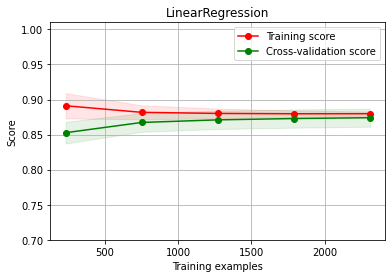

In [ ]:
print(__doc__)
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection 
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import learning_curve


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


X = train_data2[test_data2.columns].values
y = train_data2['target'].values


title = "LinearRegression"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = model_selection.ShuffleSplit(X.shape[0], n_splits=100, test_size=0.2, random_state=0)

estimator = SGDRegressor()
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=-1)

### 验证曲线

Automatically created module for IPython interactive environment


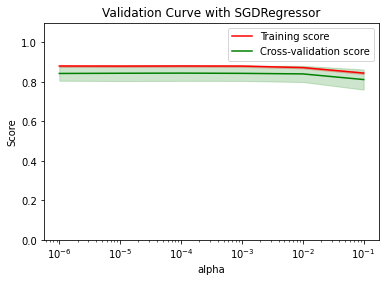

In [ ]:
print(__doc__)

import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import validation_curve

X = train_data2[test_data2.columns].values
y = train_data2['target'].values
# max_iter=1000, tol=1e-3, penalty= 'L1', alpha=0.00001

param_range = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]
train_scores, test_scores = validation_curve(
    SGDRegressor(max_iter=1000, tol=1e-3, penalty= 'L1'), X, y, param_name="alpha", param_range=param_range,
    cv=10, scoring='r2', n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with SGDRegressor")
plt.xlabel("alpha")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
plt.semilogx(param_range, train_scores_mean, label="Training score", color="r")
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2, color="r")
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="g")
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2, color="g")
plt.legend(loc="best")
plt.show()